# **Business Understanding (Problem Statement)**


1. The research question: What is impact of certain characterstics of a first time homebuyer (depending on the race) to enable mortgage delinquency payments.

2. Revised research question: What is the impact of clustering methods when uncovering distinct profiles of first-time homebuyers to predict mortgage delinquency and defaults?

  This emphasize behavioral and demographic diversity for clustering.

3. Another revised research question: What is the impact of the financial characteristics of first-time homebuyers, including race to predict mortgage delinquency rate?

  This focus on financial health predictors (e.g., credit score, debt ratios, income).


# **Data Understanding**

1. Public Use Database - Federal Home Loan Bank System
HERA Section 1212 requires the Director to make available to the public, in a form that is useful to the public (including forms accessible electronically), and to the extent practicable, census tract level data relating to mortgages purchased by each Federal Home Loan Bank. https://www.fhfa.gov/data/public-use-database-fannie-mae-and-freddie-mac

  The contents of these files are unaudited and are reported directly by the Federal Home Loan Banks to FHFA. Questions concerning the content of these files should be directed to the relevant Federal Home Loan Bank(s).

2. The FHLBS Data sets are collected from 2020 to 2022

3. Most of the characteristics investigated contain no missing values.

4. This includes all the relevenat information about the each borrower from different states and counties

**Import the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import geopandas as gpd
!pip install geopandas
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, auc

warnings.filterwarnings('ignore')

**Import the 2020 CSV file**

In [ ]:
mortgagedata_2020 = pd.read_csv('/content/2020_PUDB_EXPORT_123120.csv')

In [ ]:
mortgagedata_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83106 entries, 0 to 83105
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             83106 non-null  int64  
 1   LoanCharacteristicsID            83106 non-null  int64  
 2   Bank                             83106 non-null  object 
 3   FIPSStateNumericCode             83106 non-null  int64  
 4   FIPSCountyCode                   83106 non-null  int64  
 5   CoreBasedStatisticalAreaCode     83106 non-null  int64  
 6   CensusTractIdentifier            83106 non-null  float64
 7   CensusTractMinorityRatioPercent  83106 non-null  float64
 8   CensusTractMedFamIncomeAmount    83106 non-null  int64  
 9   LocalAreaMedianIncomeAmount      83106 non-null  int64  
 10  TotalMonthlyIncomeAmount         83106 non-null  int64  
 11  HUDMedianIncomeAmount            83106 non-null  int64  
 12  LoanAcquisitionAct

**Import the 2021 CSV file**

In [ ]:
mortgagedata_2021 = pd.read_csv('/content/2021_PUDB_EXPORT_123121.csv')

In [ ]:
mortgagedata_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63890 entries, 0 to 63889
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             63890 non-null  int64  
 1   LoanCharacteristicsID            63890 non-null  int64  
 2   Bank                             63890 non-null  object 
 3   FIPSStateNumericCode             63890 non-null  int64  
 4   FIPSCountyCode                   63890 non-null  int64  
 5   CoreBasedStatisticalAreaCode     63890 non-null  int64  
 6   CensusTractIdentifier            63890 non-null  float64
 7   CensusTractMinorityRatioPercent  63890 non-null  float64
 8   CensusTractMedFamIncomeAmount    63890 non-null  int64  
 9   LocalAreaMedianIncomeAmount      63890 non-null  int64  
 10  TotalMonthlyIncomeAmount         63890 non-null  int64  
 11  HUDMedianIncomeAmount            63890 non-null  int64  
 12  LoanAcquisitionAct

In [ ]:
mortgagedata_2021.head()

,Year,LoanCharacteristicsID,Bank,FIPSStateNumericCode,FIPSCountyCode,CoreBasedStatisticalAreaCode,CensusTractIdentifier,CensusTractMinorityRatioPercent,CensusTractMedFamIncomeAmount,LocalAreaMedianIncomeAmount,...,Borrower1Race3Type,Borrower1Race4Type,Borrower1Race5Type,Borrower2EthnicityType,Borrower2Race2Type,Borrower2Race3Type,Borrower2Race4Type,Borrower2Race5Type,HOEPALoanStatusType,LienPriorityType
0,2021,2585135,Boston,23,5,38860,45.02,6.379,91316,85144,...,7,7,7,3,7,7,7,7,2,1
1,2021,2585136,Boston,23,5,38860,41.00,3.553,100396,85144,...,7,7,7,5,8,8,8,8,2,1
2,2021,2585137,Boston,25,27,49340,7011.00,8.537,87500,91102,...,7,7,7,5,8,8,8,8,2,1
3,2021,2585138,Boston,25,27,49340,7001.00,6.052,114531,91102,...,7,7,7,2,7,7,7,7,2,1
4,2021,2585139,Boston,25,27,49340,7061.00,3.583,119423,91102,...,7,7,7,5,8,8,8,8,2,1


**Import the 2022 CSV file**

In [ ]:
mortgagedata_2022 = pd.read_csv('/content/2022_PUDB_EXPORT_123122.csv')

In [ ]:
mortgagedata_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33018 entries, 0 to 33017
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             33018 non-null  int64  
 1   LoanCharacteristicsID            33018 non-null  int64  
 2   Bank                             33018 non-null  object 
 3   FIPSStateNumericCode             33018 non-null  int64  
 4   FIPSCountyCode                   33018 non-null  int64  
 5   CoreBasedStatisticalAreaCode     33018 non-null  int64  
 6   CensusTractIdentifier            33018 non-null  float64
 7   CensusTractMinorityRatioPercent  33018 non-null  float64
 8   CensusTractMedFamIncomeAmount    33018 non-null  int64  
 9   LocalAreaMedianIncomeAmount      33018 non-null  int64  
 10  TotalMonthlyIncomeAmount         33018 non-null  int64  
 11  HUDMedianIncomeAmount            33018 non-null  int64  
 12  LoanAcquisitionAct

In [ ]:
mortgagedata_2022.head()

,Year,LoanCharacteristicsID,Bank,FIPSStateNumericCode,FIPSCountyCode,CoreBasedStatisticalAreaCode,CensusTractIdentifier,CensusTractMinorityRatioPercent,CensusTractMedFamIncomeAmount,LocalAreaMedianIncomeAmount,...,Borrower1Race3Type,Borrower1Race4Type,Borrower1Race5Type,Borrower2EthnicityType,Borrower2Race2Type,Borrower2Race3Type,Borrower2Race4Type,Borrower2Race5Type,HOEPALoanStatusType,LienPriorityType
0,2022,2715212,Boston,50,5,99999,9579.00,6.482,75769,77189,...,7,7,7,2,7,7,7,7,2,1
1,2022,2715213,Boston,9,11,35980,7081.00,9.144,95750,94894,...,7,7,7,2,7,7,7,7,2,1
2,2022,2715214,Boston,44,7,39300,130.02,8.211,90060,89555,...,7,7,7,2,7,7,7,7,2,1
3,2022,2715215,Boston,50,7,15540,27.01,14.861,113558,95011,...,7,7,7,2,7,7,7,7,2,1
4,2022,2715216,Boston,23,31,38860,220.00,7.682,66887,89988,...,7,7,7,5,8,8,8,8,2,1


## Merging the datasets

**1. Combined dataset from 2020, 2021 and 2022.**

**2. Select the first-time home buyers**
- Selected ['BorrowerFirstTimeHomebuyer'] == 1. This indicates first time home buyers
- Selected ['PropertyUsageType'] == 1. This indicates first-time homeownership, as it represents the primary residence of the property owner.

In [ ]:
mortgagedata_covid = pd.concat([mortgagedata_2020, mortgagedata_2021, mortgagedata_2022], ignore_index=True)
# Assuming 'first_time_homebuyer' is the column indicating first-time buyers.
# Replace 'first_time_homebuyer' with the actual column name if different.
first_time_buyers = mortgagedata_covid[(mortgagedata_covid['BorrowerFirstTimeHomebuyer'] == 1) & (mortgagedata_covid['PropertyUsageType'] == 1)]

In [ ]:
first_time_buyers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21130 entries, 12 to 180010
Data columns (total 57 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             21130 non-null  int64  
 1   LoanCharacteristicsID            21130 non-null  int64  
 2   Bank                             21130 non-null  object 
 3   FIPSStateNumericCode             21130 non-null  int64  
 4   FIPSCountyCode                   21130 non-null  int64  
 5   CoreBasedStatisticalAreaCode     21130 non-null  int64  
 6   CensusTractIdentifier            21130 non-null  float64
 7   CensusTractMinorityRatioPercent  21130 non-null  float64
 8   CensusTractMedFamIncomeAmount    21130 non-null  int64  
 9   LocalAreaMedianIncomeAmount      21130 non-null  int64  
 10  TotalMonthlyIncomeAmount         21130 non-null  int64  
 11  HUDMedianIncomeAmount            21130 non-null  int64  
 12  LoanAcquisitionActual

In [ ]:
first_time_buyers.describe()

,Year,LoanCharacteristicsID,FIPSStateNumericCode,FIPSCountyCode,CoreBasedStatisticalAreaCode,CensusTractIdentifier,CensusTractMinorityRatioPercent,CensusTractMedFamIncomeAmount,LocalAreaMedianIncomeAmount,TotalMonthlyIncomeAmount,...,Borrower1Race4Type,Borrower1Race5Type,Borrower2EthnicityType,Borrower2Race2Type,Borrower2Race3Type,Borrower2Race4Type,Borrower2Race5Type,HOEPALoanStatusType,LienPriorityType,LoanAcquisitionDate
count,21130.000000,2.113000e+04,21130.000000,21130.000000,21130.000000,21130.000000,21130.000000,21130.000000,21130.000000,21130.000000,...,21130.000000,21130.000000,21130.000000,21130.000000,21130.000000,21130.000000,21130.000000,21130.0,21130.0,6625.0
mean,2020.917700,2.623482e+06,30.550923,92.767345,42093.588310,3303.132391,18.281014,80043.389636,75936.719309,6924.634974,...,6.899479,6.899479,3.756981,7.534927,7.542073,7.542262,7.542262,2.0,1.0,2021.0
std,0.824454,8.041135e+04,14.581332,79.200694,29150.800242,4047.794599,18.353279,27617.117601,11564.620081,4844.563063,...,0.300700,0.300700,1.495368,0.598036,0.577764,0.577258,0.577258,0.0,0.0,0.0
min,2020.000000,2.495888e+06,1.000000,1.000000,10100.000000,1.000000,0.000000,0.000000,40627.000000,783.000000,...,6.000000,6.000000,1.000000,3.000000,5.000000,6.000000,6.000000,2.0,1.0,2021.0
25%,2020.000000,2.555267e+06,18.000000,37.000000,19780.000000,101.020000,5.532000,62375.750000,68106.250000,3969.250000,...,7.000000,7.000000,2.000000,7.000000,7.000000,7.000000,7.000000,2.0,1.0,2021.0
50%,2021.000000,2.615008e+06,27.000000,81.000000,33340.000000,530.070000,11.692500,74471.000000,74705.000000,5802.000000,...,7.000000,7.000000,5.000000,8.000000,8.000000,8.000000,8.000000,2.0,1.0,2021.0
75%,2022.000000,2.712770e+06,42.000000,131.000000,46140.000000,8465.840000,23.994000,91743.000000,81873.000000,8471.000000,...,7.000000,7.000000,5.000000,8.000000,8.000000,8.000000,8.000000,2.0,1.0,2021.0
max,2022.000000,2.745321e+06,56.000000,840.000000,99999.000000,9810.000000,99.783000,250001.000000,150332.000000,166667.000000,...,7.000000,7.000000,5.000000,8.000000,8.000000,8.000000,8.000000,2.0,1.0,2021.0


#**Data Preparation**



### Elimination of Data Columns

1. Have to eliminate some columns in the list:

  - LoanCharacteristicsID
  - NoteDate
  - LoanAcquistionDate
  - Borrower1Race2Type
  - Borrower2Race3Type
  - Borrower2Race4Type
  - Borrower2Race5Type
  - PrepaymentPenaltyExpirationDate

  Therefore, there are no null values for the remaining columns in the dataset.

In [ ]:
first_time_buyersv2 = first_time_buyers.copy()
first_time_buyersv2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21130 entries, 12 to 180010
Data columns (total 57 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             21130 non-null  int64  
 1   LoanCharacteristicsID            21130 non-null  int64  
 2   Bank                             21130 non-null  object 
 3   FIPSStateNumericCode             21130 non-null  int64  
 4   FIPSCountyCode                   21130 non-null  int64  
 5   CoreBasedStatisticalAreaCode     21130 non-null  int64  
 6   CensusTractIdentifier            21130 non-null  float64
 7   CensusTractMinorityRatioPercent  21130 non-null  float64
 8   CensusTractMedFamIncomeAmount    21130 non-null  int64  
 9   LocalAreaMedianIncomeAmount      21130 non-null  int64  
 10  TotalMonthlyIncomeAmount         21130 non-null  int64  
 11  HUDMedianIncomeAmount            21130 non-null  int64  
 12  LoanAcquisitionActual

In [ ]:
first_time_buyersv2.drop(columns = ['LoanCharacteristicsID',
                                    'NoteDate',
                                    'Borrower1Race2Type', 'BorrowerCount',
                                    'Borrower2Race3Type', 'Borrower2Race4Type',
                                    'Borrower2Race5Type', 'PrepaymentPenaltyExpirationDate',
                                    'LoanAcquistionDate'], inplace = True)

In [ ]:
first_time_buyers_v3 = first_time_buyersv2.copy()
first_time_buyers_v3.head()

,Year,Bank,FIPSStateNumericCode,FIPSCountyCode,CoreBasedStatisticalAreaCode,CensusTractIdentifier,CensusTractMinorityRatioPercent,CensusTractMedFamIncomeAmount,LocalAreaMedianIncomeAmount,TotalMonthlyIncomeAmount,...,MarginRatePercent,Borrower1EthnicityType,Borrower1Race3Type,Borrower1Race4Type,Borrower1Race5Type,Borrower2EthnicityType,Borrower2Race2Type,HOEPALoanStatusType,LienPriorityType,LoanAcquisitionDate
12,2020,Boston,25,17,14460,3641.01,10.406,114693,102945,5020,...,9999,2,7,7,7,5,8,2,1,NaN
13,2020,Boston,25,27,49340,7324.00,62.007,29851,87146,6810,...,9999,2,7,7,7,2,7,2,1,NaN
15,2020,Boston,25,17,14460,3513.00,27.026,88528,102945,8333,...,9999,2,7,7,7,5,8,2,1,NaN
19,2020,Boston,25,17,14460,3687.00,49.025,63333,102945,7866,...,9999,2,7,7,7,2,7,2,1,NaN
23,2020,Boston,25,17,14460,3689.01,20.291,117050,102945,6032,...,9999,2,7,7,7,5,8,2,1,NaN


**Topic 1: Impact of financial characteristics of first-time homebuyers, including race, to predict mortgage delinquency rates**

**Key Variables to Consider:**

- **TotalMonthlyIncomeAmount:** Directly reflects financial stability.
NoteAmount: Represents loan size, which could impact repayment capacity.
- **LTVRatioPercent**
- **HousingExpenseRatioPercent:** Measures housing costs relative to income; an important predictor of financial strain.
- **TotalDebtExpenseRatioPercent:** Indicates overall debt burden and risk.
- **Borrower1CreditScoreValue:** Strong indicator of borrower financial health and likelihood of delinquency.
- **PMICoveragePercent:** Mortgage insurance coverage can mitigate risk for lenders and impact delinquency likelihood.
- **Borrower1AgeatApplicationYears:** May correlate with financial maturity and experience.
- **PropertyType:** Indicates whether the property type has differing delinquency risks (e.g., single-family vs. multi-unit).
- **MortgageType:** Determines the structure of the loan, which could affect affordability and delinquency risk.
- **LoanAcquisitionActualUPBAmt**: provides insight into the loan's size and risk exposure. A higher unpaid balance could increase the financial strain on borrowers, especially for first-time homebuyers with limited resources.
- **Borrower1Race1Type**
- **Borrower1EthnicityType**
- **Borrower1GenderType**


**Variables less relevant to the topics**

- **MarginRatePercent:** This variable is highly specialized and may have less direct influence on first-time homebuyer profiles or delinquency unless the loan is adjustable-rate.
- **IndexSourceType:** Could be excluded unless focusing specifically on interest rate mechanisms.
- **MortgageLoanSellerInstType:** Less relevant unless institutional lender types significantly impact borrower clustering or delinquency.

**Variables relevant to data visualisations**
-  Bank
- FIPSStateNumericCode     
- FIPSCountyCode                       
- CensusTractIdentifier           
- CensusTractMinorityRatioPercent   
- CensusTractMedFamIncomeAmount    
- LocalAreaMedianIncomeAmount


In [ ]:
fin_char_data = first_time_buyers_v3[['Bank', 'FIPSStateNumericCode',
                                      'FIPSCountyCode', 'CensusTractIdentifier',
                                      'CensusTractMinorityRatioPercent',
                                      'LocalAreaMedianIncomeAmount',
                                      'CensusTractMedFamIncomeAmount',
                                      'TotalMonthlyIncomeAmount',
                                      'NoteAmount',
                                      'HousingExpenseRatioPercent',
                                      'TotalDebtExpenseRatioPercent',
                                      'LoanAcquisitionActualUPBAmt',
                                      'LTVRatioPercent',
                                      'Borrower1CreditScoreValue',
                                      'PMICoveragePercent',
                                      'Borrower1AgeAtApplicationYears',
                                      'Borrower1Race1Type',
                                      'Borrower1EthnicityType',
                                      'Borrower1GenderType',
                                      'PropertyType',
                                      'MortgageType']]

fin_char_data.head()

,Bank,FIPSStateNumericCode,FIPSCountyCode,CensusTractIdentifier,CensusTractMinorityRatioPercent,LocalAreaMedianIncomeAmount,CensusTractMedFamIncomeAmount,TotalMonthlyIncomeAmount,NoteAmount,HousingExpenseRatioPercent,...,LoanAcquisitionActualUPBAmt,LTVRatioPercent,Borrower1CreditScoreValue,PMICoveragePercent,Borrower1AgeAtApplicationYears,Borrower1Race1Type,Borrower1EthnicityType,Borrower1GenderType,PropertyType,MortgageType
12,Boston,25,17,3641.01,10.406,102945,114693,5020,275500,31.64,...,275094,95.0,5,30.0,26,5,2,1,PT06,0
13,Boston,25,27,7324.00,62.007,87146,29851,6810,261000,25.99,...,260632,75.0,4,0.0,32,3,2,1,PT09,0
15,Boston,25,17,3513.00,27.026,102945,88528,8333,396000,30.59,...,396000,90.0,4,25.0,26,2,2,2,PT06,0
19,Boston,25,17,3687.00,49.025,102945,63333,7866,560000,39.39,...,560000,80.0,5,0.0,29,5,2,1,PT04,0
23,Boston,25,17,3689.01,20.291,102945,117050,6032,195000,24.13,...,195000,80.0,5,0.0,31,5,2,2,PT06,0


In [ ]:
fin_char_data.shape

(21130, 21)

In [ ]:
fin_char_data.to_csv('fin_char_data.csv')

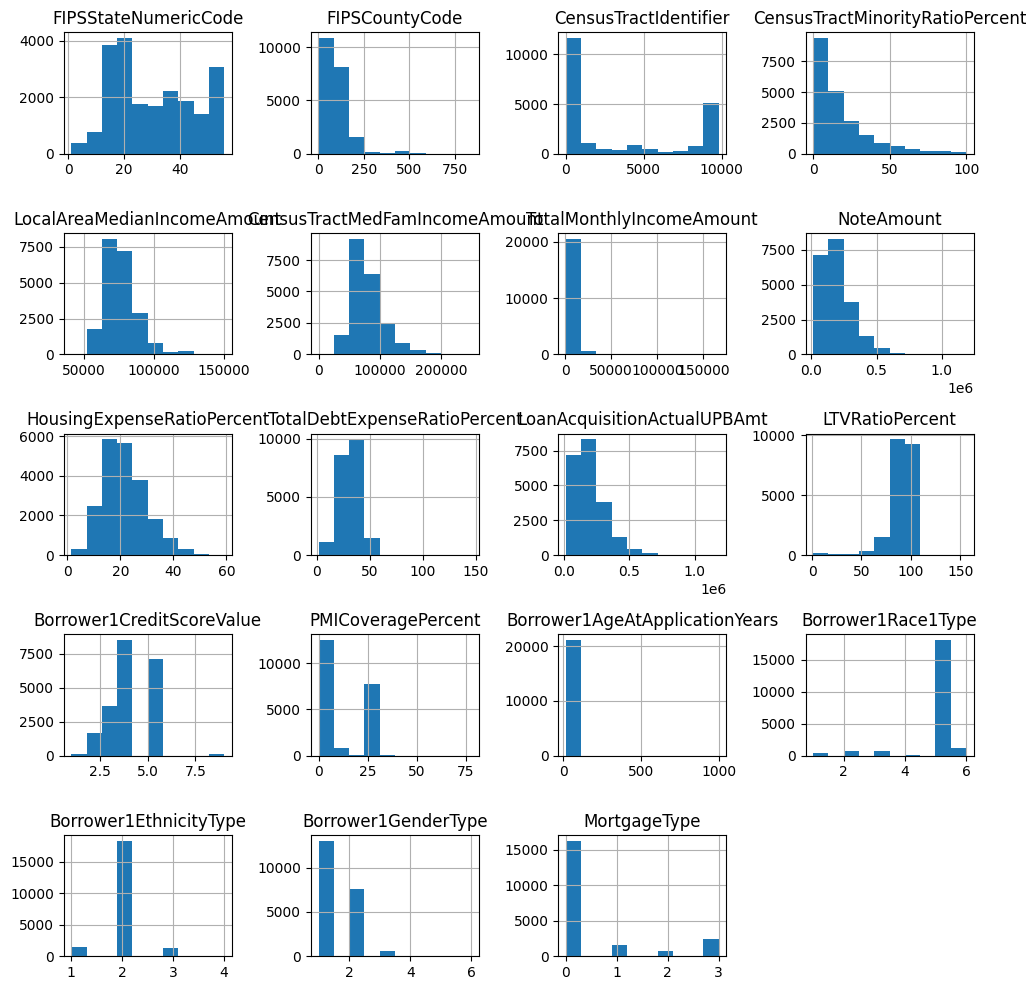

In [ ]:
fin_char_data.hist(figsize=(10, 10), layout=(5, 4), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [ ]:
borrower_profile_data = first_time_buyers_v3[['Bank', 'FIPSStateNumericCode',
                                              'FIPSCountyCode', 'CensusTractIdentifier',
                                              'CensusTractMinorityRatioPercent', 'LocalAreaMedianIncomeAmount',
                                              'CensusTractMedFamIncomeAmount', 'TotalMonthlyIncomeAmount', 'Borrower1CreditScoreValue',
                                              'HousingExpenseRatioPercent', 'TotalDebtExpenseRatioPercent',
                                              'LoanPurposeType', 'ScheduledTotalPaymentCount',
                                              'LoanAcquisitionActualUPBAmt',
                                              'LTVRatioPercent',
                                              'LoanAmortizationMaxTermMonths',
                                              'Borrower1AgeAtApplicationYears',
                                              'Borrower1Race1Type', 'Borrower1EthnicityType', 'Borrower1GenderType',
                                              'EmploymentBorrowerSelfEmployed', 'ProductCategoryName',
                                              'PropertyUnitCount']]

borrower_profile_data.head()

,Bank,FIPSStateNumericCode,FIPSCountyCode,CensusTractIdentifier,CensusTractMinorityRatioPercent,LocalAreaMedianIncomeAmount,CensusTractMedFamIncomeAmount,TotalMonthlyIncomeAmount,Borrower1CreditScoreValue,HousingExpenseRatioPercent,...,LoanAcquisitionActualUPBAmt,LTVRatioPercent,LoanAmortizationMaxTermMonths,Borrower1AgeAtApplicationYears,Borrower1Race1Type,Borrower1EthnicityType,Borrower1GenderType,EmploymentBorrowerSelfEmployed,ProductCategoryName,PropertyUnitCount
12,Boston,25,17,3641.01,10.406,102945,114693,5020,5,31.64,...,275094,95.0,360,26,5,2,1,0,1,1
13,Boston,25,27,7324.00,62.007,87146,29851,6810,4,25.99,...,260632,75.0,360,32,3,2,1,0,1,3
15,Boston,25,17,3513.00,27.026,102945,88528,8333,4,30.59,...,396000,90.0,360,26,2,2,2,0,1,1
19,Boston,25,17,3687.00,49.025,102945,63333,7866,5,39.39,...,560000,80.0,360,29,5,2,1,0,1,2
23,Boston,25,17,3689.01,20.291,102945,117050,6032,5,24.13,...,195000,80.0,360,31,5,2,2,0,1,1


In [ ]:
borrower_profile_data.shape

(21130, 23)

# **Data Visualisation**

**1. Histograms Plots:**
- Income
- LTVRatioPercent
- LoanAcquisitionActualUPBAmt

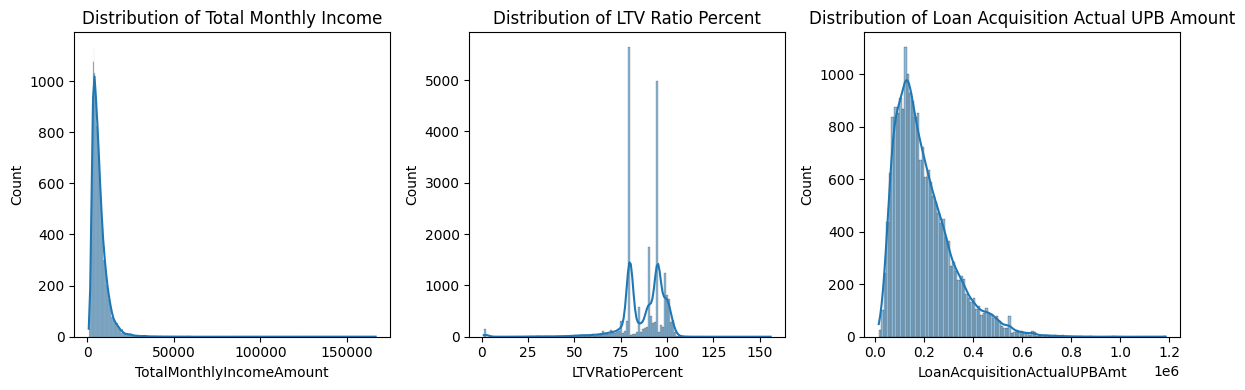

In [ ]:
# prompt: Histograms Plots:
# - Income
# - LTVRatioPercent
# - LoanAcquisitionActualUPBAmt

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(fin_char_data['TotalMonthlyIncomeAmount'], kde=True)
plt.title('Distribution of Total Monthly Income')

plt.subplot(1, 3, 2)
sns.histplot(fin_char_data['LTVRatioPercent'], kde=True)
plt.title('Distribution of LTV Ratio Percent')

plt.subplot(1, 3, 3)
sns.histplot(fin_char_data['LoanAcquisitionActualUPBAmt'], kde=True)
plt.title('Distribution of Loan Acquisition Actual UPB Amount')

plt.tight_layout()
plt.show()

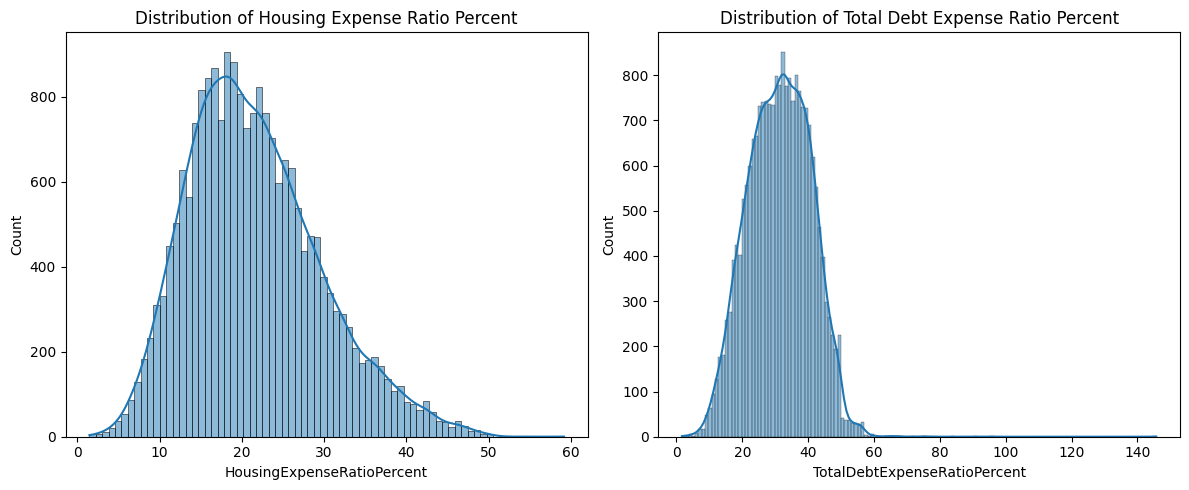

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(fin_char_data['HousingExpenseRatioPercent'], kde = True)
plt.title('Distribution of Housing Expense Ratio Percent')

plt.subplot(1, 2, 2)
sns.histplot(fin_char_data['TotalDebtExpenseRatioPercent'], kde = True)
plt.title('Distribution of Total Debt Expense Ratio Percent')

plt.tight_layout()
plt.show()

According to the histograms:
- The Total Monthly Income in the dataset has right-skewed distribution.
- The LTV Ratio Percent in the datset has bimodel distribution.
- The Loan Acquisition actual UPB Amount is right-skewed distribution.
- The Housing Expense Ratio Percent in the data has a right-skewed distribution.
- The Debt Expenses Ratio Percent in the dataset has a right-skewed distribution.


2. Geopandas: Using the FIPSStateNumericCode and FIPSCountyCode to create maps of the following variable:
- LTVRatioPercent (percentage of the LVT Ratio)
- CensusTractMinorityRatioPercent
- LocalAreaMedianIncomeAmount
- CensusTractMedFamIncomeAmount

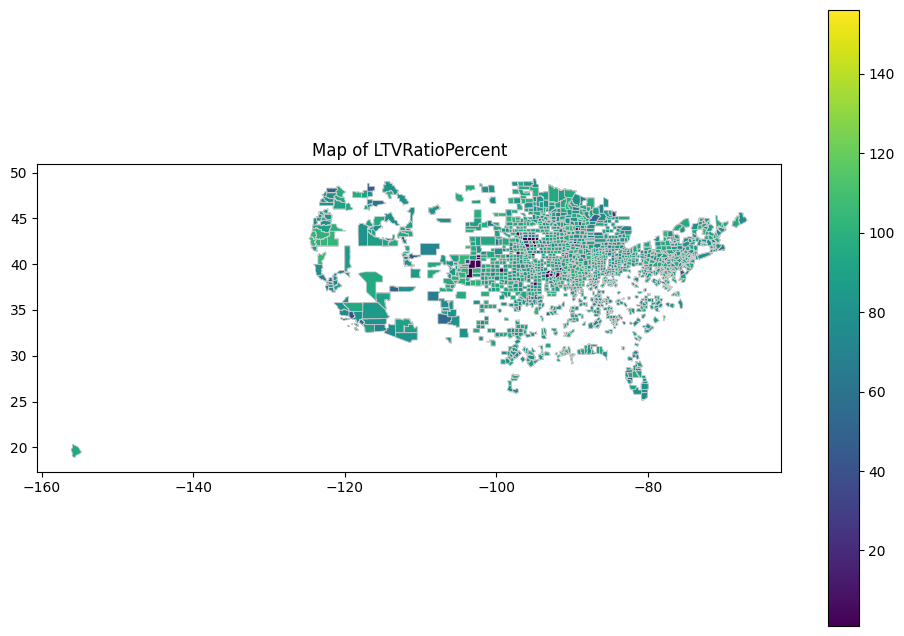

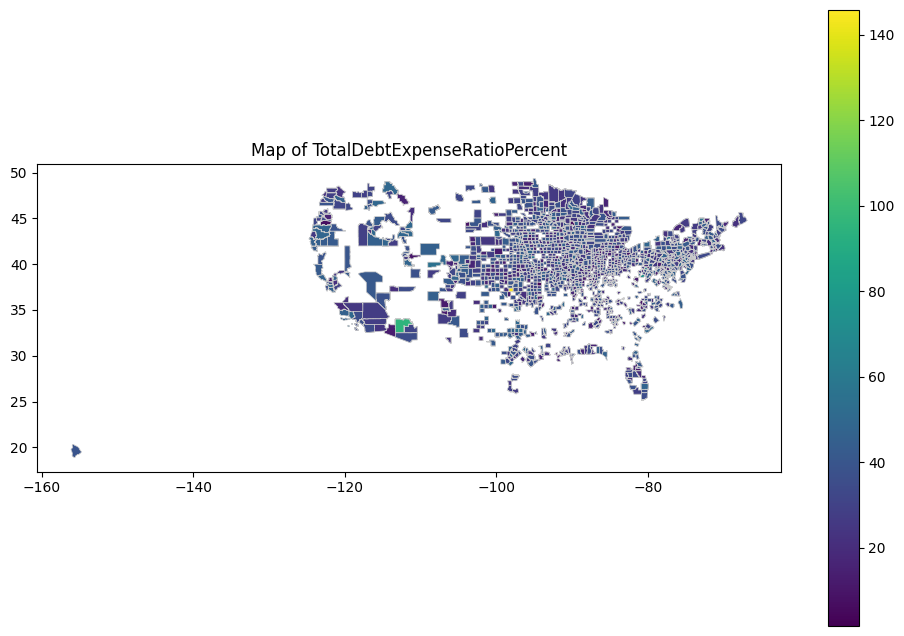

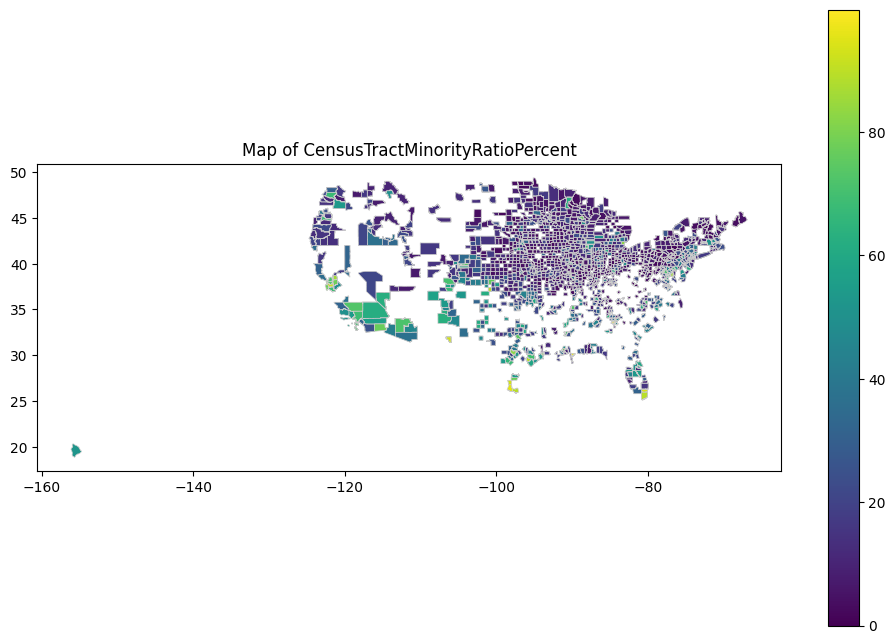

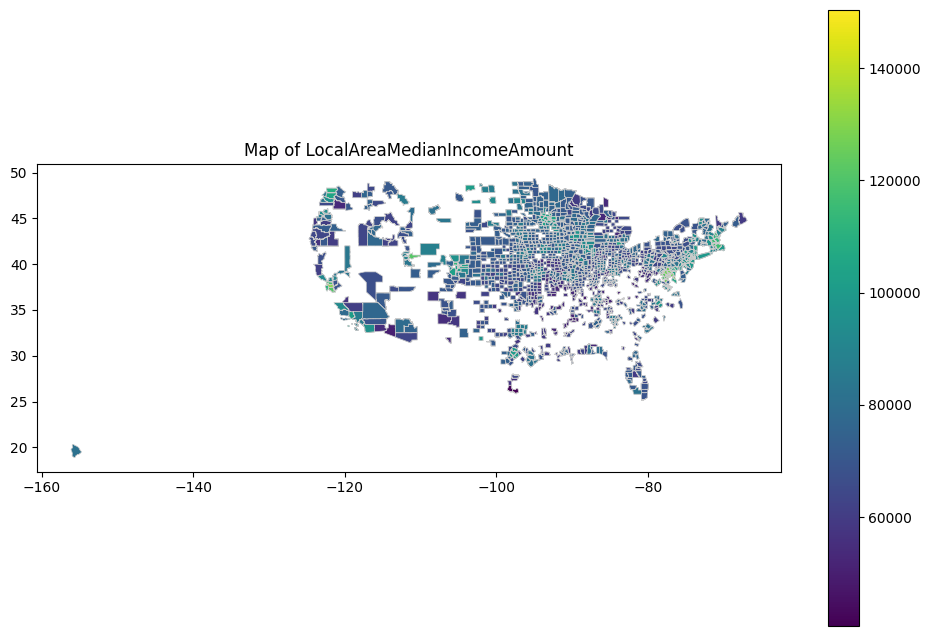

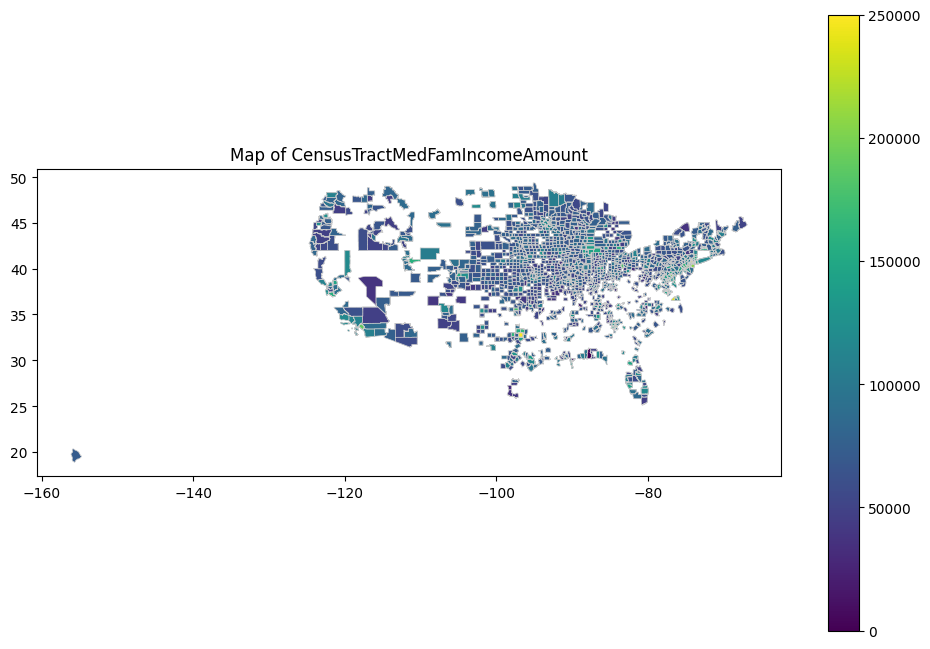

In [ ]:
# shapefiles with corresponding FIPS codes.
!wget -q https://www2.census.gov/geo/tiger/TIGER2024/COUNTY/tl_2024_us_county.zip
!unzip -o -q tl_2024_us_county.zip -d /content/

try:
  counties = gpd.read_file('/content/tl_2024_us_county.shp')
except FileNotFoundError:
  print("Error: Shapefile not found. Please provide the correct path.")
  exit()

# Merge your data with the shapefile based on FIPS codes
counties['STATEFP'] = counties['STATEFP'].astype(int)
counties['COUNTYFP'] = counties['COUNTYFP'].astype(int)

merged_data = counties.merge(fin_char_data,
                             left_on=['STATEFP', 'COUNTYFP'],
                             right_on=['FIPSStateNumericCode', 'FIPSCountyCode'],
                             how='inner')


variables_to_map = ['LTVRatioPercent', 'TotalDebtExpenseRatioPercent', 'CensusTractMinorityRatioPercent',
                    'LocalAreaMedianIncomeAmount', 'CensusTractMedFamIncomeAmount']

for variable in variables_to_map:
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    merged_data.plot(column=variable, cmap='viridis', linewidth=0.5, ax=ax, edgecolor='0.8', legend=True)
    plt.title(f'Map of {variable}')
    plt.show()

#**Feature Engineering**

- target variable creation
- normalisaton of the algorithms (log-normal)

##Target Variable Creation

I will construct the target variable to feature those who are at risk to mortgage deliquency, as there is no variable that shows whether the borrower has defualted. Therefore, I will explore the variables that are best to represent high risk of mortgage deliquency based on this information:


- `Higher HousingExpenseRatioPercent` or `TotalDebtExpenseRatioPercent` could imply higher risk of delinquency.
Example: Flag borrowers with `TotalDebtExpenseRatioPercent` > 43% (a common threshold for loan approval) as "at risk."

- Predict Default Probability:
If you have data indicating whether a loan was fully repaid, in default, or charged off, this could be used as a proxy for mortgage delinquency. (However, I lack the information to identify which variable is best in the original dataset).

- Credit Score Thresholds: Use low `Borrower1CreditScoreValue` as a proxy for high delinquency risk (e.g., below 620 is often considered subprime).
Credit Scores are separated into a range:  1=<620, 2=620  < 660, 3=660 < 700, 4=700 < 760, 5=760 or greater,  9 = Missing or Not Applicable





In [ ]:
fin_char_data_v2 = fin_char_data.copy()

max_debt_expense_ratio = fin_char_data_v2['TotalDebtExpenseRatioPercent'].max()
print(f"The maximum value for TotalDebtExpenseRatioPercent is: {max_debt_expense_ratio}")

count_debt_expense_greater_than_43 = fin_char_data_v2[fin_char_data_v2['TotalDebtExpenseRatioPercent'] > 43].shape[0]
print(f"Number of rows with TotalDebtExpenseRatioPercentage > 43: {count_debt_expense_greater_than_43}")

count_debt_expense_less_than_43 = fin_char_data_v2[fin_char_data_v2['TotalDebtExpenseRatioPercent'] <= 43].shape[0]
print(f"Number of rows with TotalDebtExpenseRatioPercentage <= 43: {count_debt_expense_less_than_43}")

The maximum value for TotalDebtExpenseRatioPercent is: 145.75
Number of rows with TotalDebtExpenseRatioPercentage > 43: 2268
Number of rows with TotalDebtExpenseRatioPercentage <= 43: 18862


In [ ]:
fin_char_data_v2['HighRiskofMortgageDeliquency'] = fin_char_data_v2['TotalDebtExpenseRatioPercent'].apply(lambda x:1 if x>43 else 0)

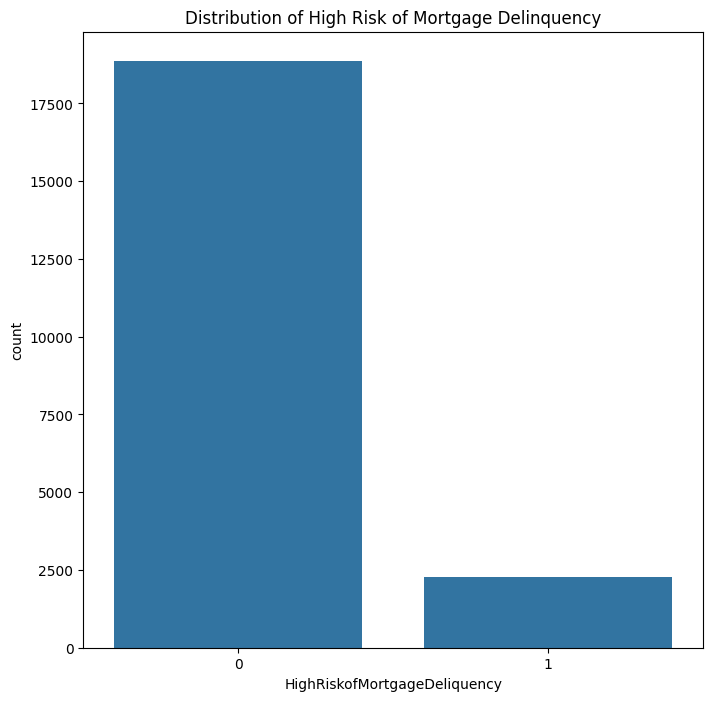

In [ ]:
plt.figure(figsize=(8, 8))
plt.title('Distribution of High Risk of Mortgage Delinquency')
sns.countplot(x='HighRiskofMortgageDeliquency', data=fin_char_data_v2)
plt.show()

We can observe that:
- Number of borrowers that are at high risk of mortgage deliquency: 2268
- Number of borrowers that are at high risk of mortgage deliquency: 18716

### **Data Visualisation after the Creation of the Target Variable**

**Investigate those who are more likely to at risk of mortgage deliquency rate by race `Borrower1Race1Type` , gender `Borrower1GenderType` and by ethnicity `Borrower1EthnicityType` [white non-hispanics and hispanics]**

Context of each variable (borrower's characteristcs'):
- `Borrower1Race1Type`: Numeric code indicating the race of the Borrower.  1=American Indian or Alaska Native, 2=Asian, 3=Black or African American, 4=Native Hawaiian or other Pacific Islander, 5=White, 6=Information not provided by Borrower, 7=Not Applicable (First or primary borrower is an institution, corporation or partnership)
- `Borrower1GenderType`: Numeric code indicating the sex of the first or primary borrower.  1=Male, 2=Female, 3=Information not provided by borrower, 4=Not Applicable (First or primary borrower is an institution, corporation or partnership), 6=Borrower selected both male and female
- `Borrower1EthnicityType`: 1=Hispanic or Latino; 2=Not Hispanic or Latino; 3=Information not provided; 4=Not applicable (First or primary borrower is an institution, corporation or partnership)


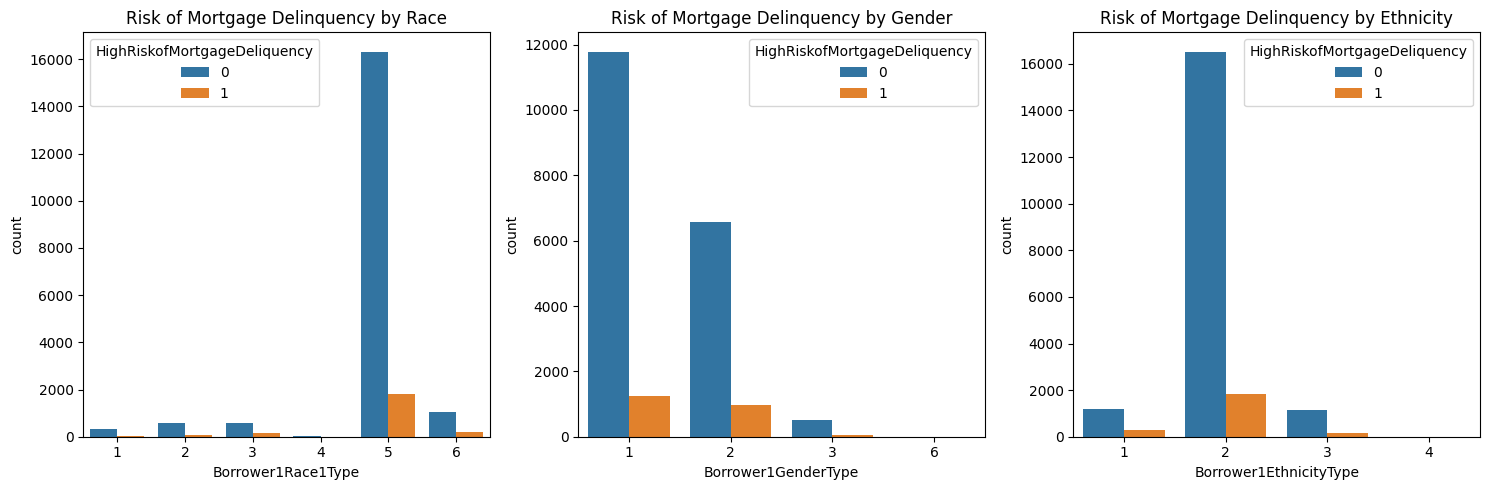

In [ ]:
# Create the barplots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Borrower1Race1Type', hue='HighRiskofMortgageDeliquency', data=fin_char_data_v2)
plt.title('Risk of Mortgage Delinquency by Race')

plt.subplot(1, 3, 2) # 1 row, 3 columns, 2nd subplot
sns.countplot(x='Borrower1GenderType', hue='HighRiskofMortgageDeliquency', data=fin_char_data_v2)
plt.title('Risk of Mortgage Delinquency by Gender')

plt.subplot(1, 3, 3)
sns.countplot(x='Borrower1EthnicityType', hue='HighRiskofMortgageDeliquency', data=fin_char_data_v2)
plt.title('Risk of Mortgage Delinquency by Ethnicity')

plt.tight_layout()
plt.show()

**Borrower1Race1Type**

This chart shows how different racial groups experience mortgage delinquency risk:

- Race 5 (White):

  Dominates the dataset, with most borrowers being in the low-risk category (blue bar).
  A relatively small proportion falls into the high-risk category (orange bar).

- Race 3 (Black or African American):
  Higher relative proportion of borrowers are in the high-risk category compared to other races, suggesting greater vulnerability to mortgage delinquency.

- Other Races (1, 2, 4, 6, 7):
  Smaller representation in the dataset.
  Proportions of high-risk borrowers vary but are less prominent due to the smaller sample sizes.

Key Insight: White borrowers are overrepresented in the dataset and largely low-risk. Black or African American borrowers show a higher delinquency risk, potentially pointing to systemic disparities in income, lending policies, or financial stability.

**Borrower1GenderType**

This chart reflects the delinquency risk based on gender:

- Gender 1 (Male):
Most borrowers are male, and the majority are in the low-risk category (blue bar).
A smaller proportion is high-risk (orange bar).

- Gender 2 (Female):
Fewer borrowers than males, but a higher proportion of females fall into the high-risk category, suggesting that female borrowers may face greater financial challenges.

- Other Categories (3, 4, 6):
Limited representation in the dataset, making it harder to infer patterns.

Key Insight: Female borrowers seem to have a slightly higher risk of delinquency relative to males, which could be linked to gender pay gaps or other socioeconomic factors.

**Borrower1EthnicityType**
This chart focuses on mortgage delinquency risk by ethnicity:

- Ethnicity 2 (Not Hispanic or Latino):
Largest group in the dataset, with most borrowers in the low-risk category (blue bar).
A small proportion is high-risk (orange bar).

- Ethnicity 1 (Hispanic or Latino):
Smaller group overall but has a higher proportion of high-risk borrowers compared to Ethnicity 2.

- Other Categories (3, 4):
Limited data, so patterns are harder to interpret.

Key Insight: Hispanic or Latino borrowers show a higher proportion of delinquency risk, potentially reflecting income disparities, lending practices, or other financial barriers.



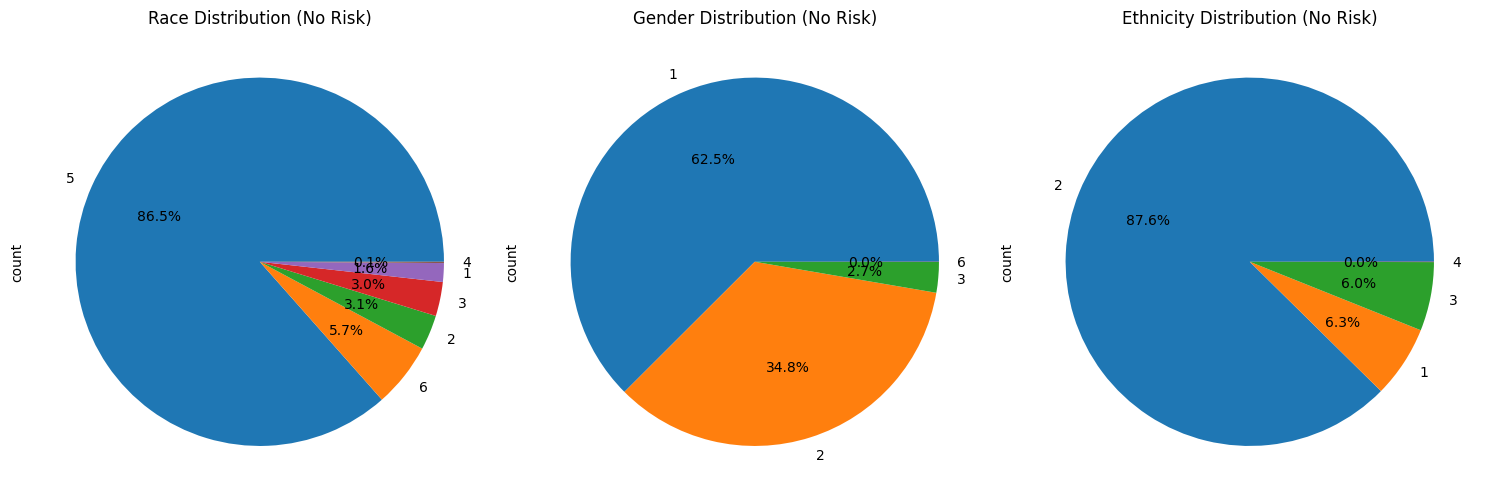

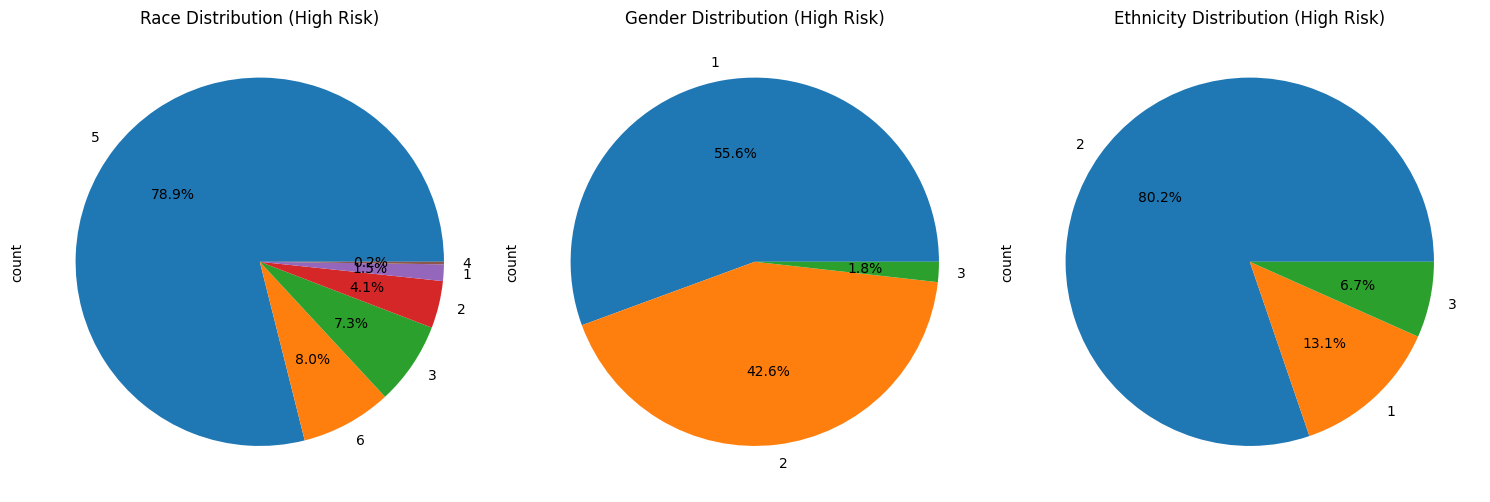

In [ ]:
# Pie charts for HighRiskofMortgageDeliquency == 0
no_risk_data = fin_char_data_v2[fin_char_data_v2['HighRiskofMortgageDeliquency'] == 0]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
no_risk_data['Borrower1Race1Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Race Distribution (No Risk)')

plt.subplot(1, 3, 2)
no_risk_data['Borrower1GenderType'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender Distribution (No Risk)')

plt.subplot(1, 3, 3)
no_risk_data['Borrower1EthnicityType'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Ethnicity Distribution (No Risk)')

plt.tight_layout()
plt.show()

# Pie charts for HighRiskofMortgageDeliquency == 1
high_risk_data = fin_char_data_v2[fin_char_data_v2['HighRiskofMortgageDeliquency'] == 1]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
high_risk_data['Borrower1Race1Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Race Distribution (High Risk)')

plt.subplot(1, 3, 2)
high_risk_data['Borrower1GenderType'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Gender Distribution (High Risk)')

plt.subplot(1, 3, 3)
high_risk_data['Borrower1EthnicityType'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Ethnicity Distribution (High Risk)')

plt.tight_layout()
plt.show()

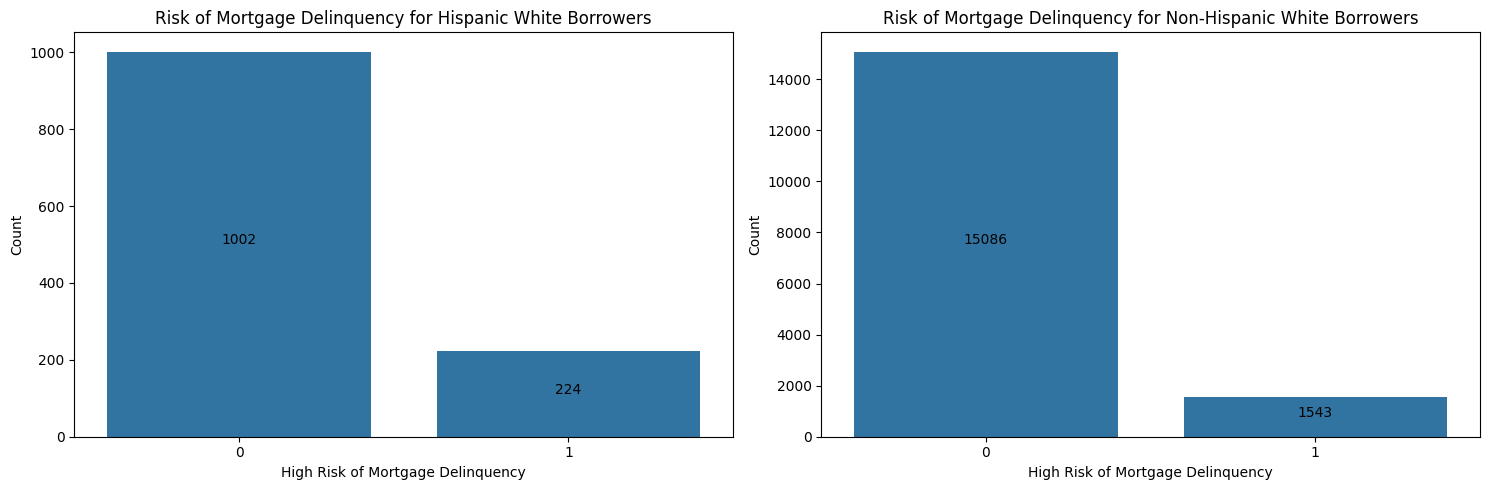

In [ ]:
# Filter for Hispanic White
hispanic_white = fin_char_data_v2[(fin_char_data_v2['Borrower1Race1Type'] == 5) & (fin_char_data_v2['Borrower1EthnicityType'] == 1)]

# Filter for Non-Hispanic White
non_hispanic_white = fin_char_data_v2[(fin_char_data_v2['Borrower1Race1Type'] == 5) & (fin_char_data_v2['Borrower1EthnicityType'] == 2)]

plt.figure(figsize=(15, 5))
# Create the first barplot (Hispanic White)

def addlabels(x,y):
    for i in range(len(y)):
        plt.text(y.index[i], y.values[i]//2, y.values[i], ha = 'center')

plt.subplot(1, 2, 1)
sns.countplot(x='HighRiskofMortgageDeliquency', data=hispanic_white)
addlabels(hispanic_white['HighRiskofMortgageDeliquency'], hispanic_white['HighRiskofMortgageDeliquency'].value_counts())
plt.title('Risk of Mortgage Delinquency for Hispanic White Borrowers')
plt.xlabel('High Risk of Mortgage Delinquency')
plt.ylabel('Count')

# Create the second barplot (Non-Hispanic White)

plt.subplot(1, 2, 2)
sns.countplot(x='HighRiskofMortgageDeliquency', data=non_hispanic_white)
addlabels(non_hispanic_white['HighRiskofMortgageDeliquency'], non_hispanic_white['HighRiskofMortgageDeliquency'].value_counts())
plt.title('Risk of Mortgage Delinquency for Non-Hispanic White Borrowers')
plt.xlabel('High Risk of Mortgage Delinquency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

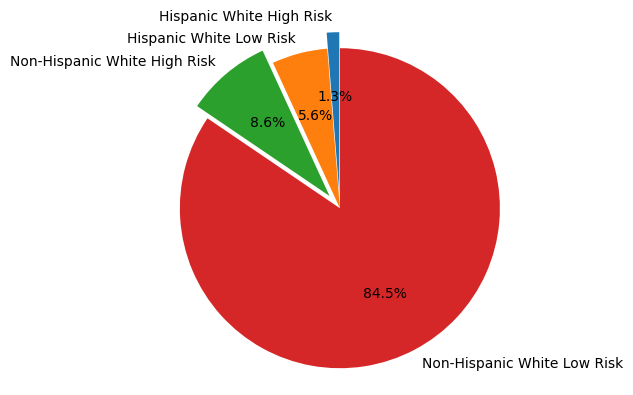

In [ ]:
# Filter for White borrowers
white_borrowers = fin_char_data_v2[fin_char_data_v2['Borrower1Race1Type'] == 5]

# Filter by ethnicity
hispanic_white_borrowers = white_borrowers[white_borrowers['Borrower1EthnicityType'] == 1]
non_hispanic_white_borrowers = white_borrowers[white_borrowers['Borrower1EthnicityType'] == 2]

# Calculate the counts for each group and risk level
hispanic_high_risk = hispanic_white_borrowers['HighRiskofMortgageDeliquency'].sum()
hispanic_low_risk = len(hispanic_white_borrowers) - hispanic_high_risk
non_hispanic_high_risk = non_hispanic_white_borrowers['HighRiskofMortgageDeliquency'].sum()
non_hispanic_low_risk = len(non_hispanic_white_borrowers) - non_hispanic_high_risk

labels = ['Hispanic White High Risk', 'Hispanic White Low Risk', 'Non-Hispanic White High Risk', 'Non-Hispanic White Low Risk']
sizes = [hispanic_high_risk, hispanic_low_risk, non_hispanic_high_risk, non_hispanic_low_risk]
explode = (0.1, 0, 0.1, 0)  # explode the 1st and 3rd slices

fig, ax = plt.subplots()
ax.pie(sizes, explode = explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

- Non-Hispanic white borrowers dominate the low-risk category (84.5%), suggesting they generally have better financial characteristics or access to more favorable mortgage terms.

- Hispanic white borrowers have a much smaller share of low-risk and high-risk categories, potentially reflecting disparities in access to credit, socioeconomic differences, or other structural factors.

##Log Transformation (Normalisation)

In [ ]:
fin_char_data_v3 = fin_char_data_v2.copy() #copy to have a dataset that has been normalised

columns = ['TotalMonthlyIncomeAmount', 'LTVRatioPercent', 'LoanAcquisitionActualUPBAmt', 'HousingExpenseRatioPercent', 'TotalDebtExpenseRatioPercent']
for i in columns:
  fin_char_data_v3[i] = fin_char_data_v3[i].map(lambda x: np.log(x) if x!= 0 else 0)

fin_char_data_v3.shape

(21130, 22)

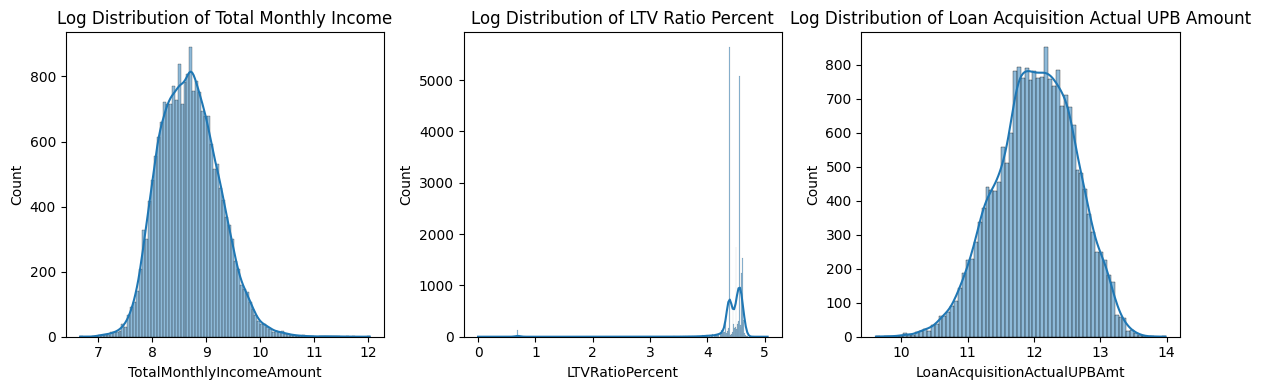

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(fin_char_data_v3['TotalMonthlyIncomeAmount'], kde=True)
plt.title('Log Distribution of Total Monthly Income')

plt.subplot(1, 3, 2)
sns.histplot(fin_char_data_v3['LTVRatioPercent'], kde=True)
plt.title('Log Distribution of LTV Ratio Percent')

plt.subplot(1, 3, 3)
sns.histplot(fin_char_data_v3['LoanAcquisitionActualUPBAmt'], kde=True)
plt.title('Log Distribution of Loan Acquisition Actual UPB Amount')

plt.tight_layout()
plt.show()

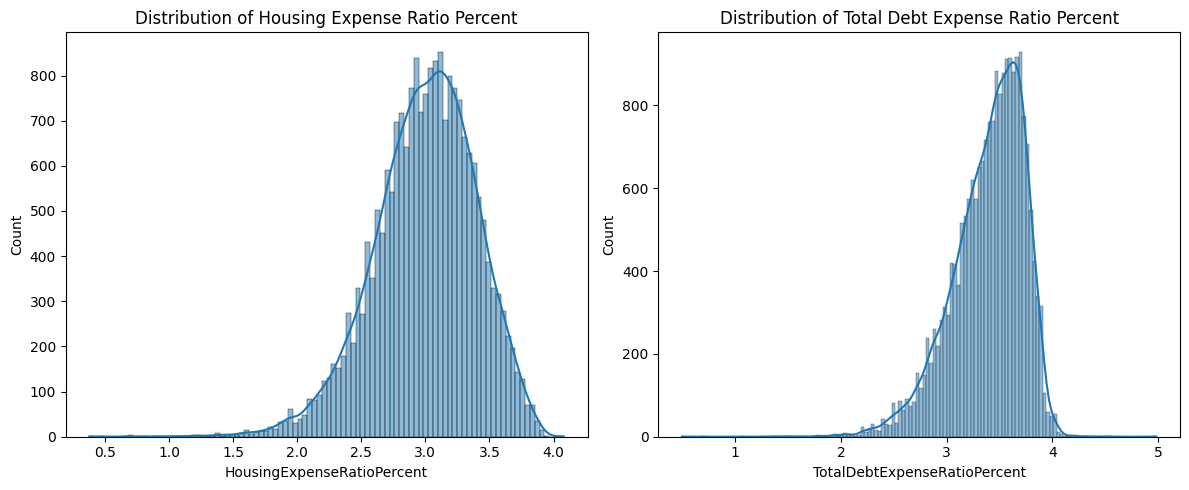

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(fin_char_data_v3['HousingExpenseRatioPercent'], kde = True)
plt.title('Distribution of Housing Expense Ratio Percent')

plt.subplot(1, 2, 2)
sns.histplot(fin_char_data_v3['TotalDebtExpenseRatioPercent'], kde = True)
plt.title('Distribution of Total Debt Expense Ratio Percent')

plt.tight_layout()
plt.show()

According to the histograms:
- The Total Monthly Income in the dataset now follows a normal distribution.
- The LTV Ratio Percent in the datset now follows a left skewed distribution.
- The Loan Acquisition actual UPB Amount now follows a normal distribution.

Therefore, we need to use an outlier detector to understand the distribution of the selected columns using boxplots.

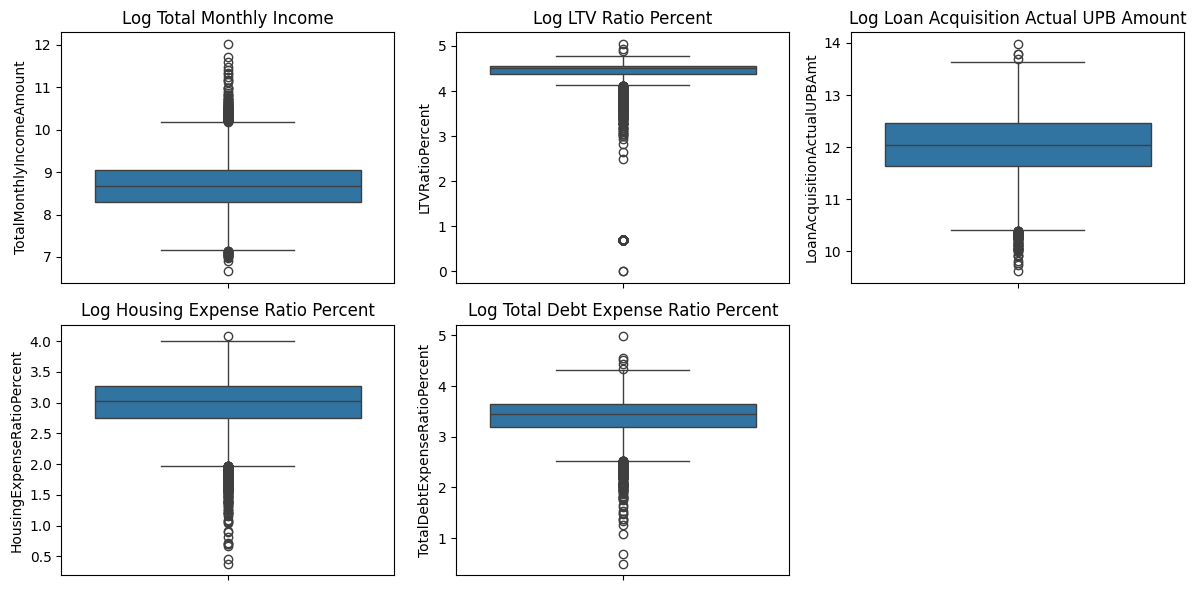

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
sns.boxplot(y=fin_char_data_v3['TotalMonthlyIncomeAmount'])
plt.title('Log Total Monthly Income')

plt.subplot(2, 3, 2)
sns.boxplot(y=fin_char_data_v3['LTVRatioPercent'])
plt.title('Log LTV Ratio Percent')

plt.subplot(2, 3, 3)
sns.boxplot(y=fin_char_data_v3['LoanAcquisitionActualUPBAmt'])
plt.title('Log Loan Acquisition Actual UPB Amount')

plt.subplot(2, 3, 4)
sns.boxplot(y=fin_char_data_v3['HousingExpenseRatioPercent'])
plt.title('Log Housing Expense Ratio Percent')

plt.subplot(2, 3, 5)
sns.boxplot(y=fin_char_data_v3['TotalDebtExpenseRatioPercent'])
plt.title('Log Total Debt Expense Ratio Percent')


plt.tight_layout()
plt.show()

We can observe that there are a lot of outliers for the selected columns: 'TotalMonthlyIncomeAmount', 'LTVRatioPercent', 'LoanAcquisitionActualUPBAmt', 'HousingExpenseRatioPercent', 'TotalDebtExpenseRatioPercent'.

Therefore, we have to use PCA models to help reduce the dimensionality for machine learning methods to do multivariate analysis.

#**PCA analysis**
- train the set with the normalisation (fin_char_data_v3)
- train the set without normalisation (fin_char_data_v2)

In [ ]:
# train-test split the data for fin_char_data_v2 to 80%-20% respectively by rows
train_data_v2, test_data_v2 = train_test_split(fin_char_data_v2, test_size=0.2, random_state=42) # 80% train, 20% test

print("Training data shape:", train_data_v2.shape)
print("Testing data shape:", test_data_v2.shape)

Training data shape: (16904, 22)
Testing data shape: (4226, 22)


In [ ]:
# train-test split the data for fin_char_data_v3 to 80%-20% respectively by rows
train_data_v3, test_data_v3 = train_test_split(fin_char_data_v3, test_size=0.2, random_state=42) # 80% train, 20% test

print("Training data shape:", train_data_v3.shape)
print("Testing data shape:", test_data_v3.shape)

Training data shape: (16904, 22)
Testing data shape: (4226, 22)


Eliminate the census information and TotalDebtExpenseRatioPercent' (as, it closely related 'HighRiskofMortgageDeliquency') to conduct PCA:


In [ ]:
fin_char_data_without_census_v3 = fin_char_data_v3[['TotalMonthlyIncomeAmount',
                                      'NoteAmount',
                                      'HousingExpenseRatioPercent',
                                      'LoanAcquisitionActualUPBAmt',
                                      'LTVRatioPercent',
                                      'Borrower1CreditScoreValue',
                                      'PMICoveragePercent',
                                      'Borrower1AgeAtApplicationYears',
                                      'Borrower1Race1Type',
                                      'Borrower1EthnicityType',
                                      'Borrower1GenderType',
                                      'PropertyType',
                                      'MortgageType',
                                      'HighRiskofMortgageDeliquency']]

Convert the 'PropertyType' into numerical categorical orders to scale it:

- 1 - PT01=Single family detached;
- 2 - PT02=Deminimus PUD;
- 3 - PT03=Single family attached;
- 4 - PT04=Two family; PT05=Townhouse;
- 5 - PT06=Low-rise condo;
- 6 - PT07=PUD; PT08=Duplex;
- 7 - PT09=Three family;
- 8 - PT10=Four family;
- 9 - PT11=Hi-res condo;
- 10 - PT12=Manufactured home not chattel;
- 11- PT13=Manufactured home chattel;
- 12 PT14=Five plus multifamily

In [ ]:
# Create a mapping dictionary for PropertyType
property_type_mapping = {
    'PT01': 1, 'PT02': 2, 'PT03': 3, 'PT04': 4, 'PT05': 4,
    'PT06': 5, 'PT07': 6, 'PT08': 6, 'PT09': 7, 'PT10': 8,
    'PT11': 9, 'PT12': 10, 'PT13': 11, 'PT14': 12
}

# Apply the mapping to the 'PropertyType' column
fin_char_data_without_census_v3['PropertyType'] = fin_char_data_without_census_v3['PropertyType'].map(property_type_mapping)

Then, PCA Analysis is constructed with the normalised dataset:

In [ ]:
#Standard scaling
#PCA requires scaling/normalization of the data to work properly
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Define X and y from the dataset
X_v3 = fin_char_data_without_census_v3.drop('HighRiskofMortgageDeliquency',axis=1)
y_v3 = fin_char_data_without_census_v3['HighRiskofMortgageDeliquency']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_v3, y_v3, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_v3_scaled = scaler.fit_transform(X_train)
X_test_v3_scaled = scaler.transform(X_test)

# Get column names from the original DataFrame
column_names = X_v3.columns # Get column names before scaling

# Create a DataFrame with the scaled trained data and original column names
dfx3 = pd.DataFrame(data=X_train_v3_scaled, columns=column_names)

In [ ]:
#PCA class import and analysis
from sklearn.decomposition import PCA

#n_components (int, float or ‘mle’, default=None)
#Number of components to keep. if n_components is not set all components are kept:

pca = PCA(n_components=None)
dfx3_pca = pca.fit(dfx3)

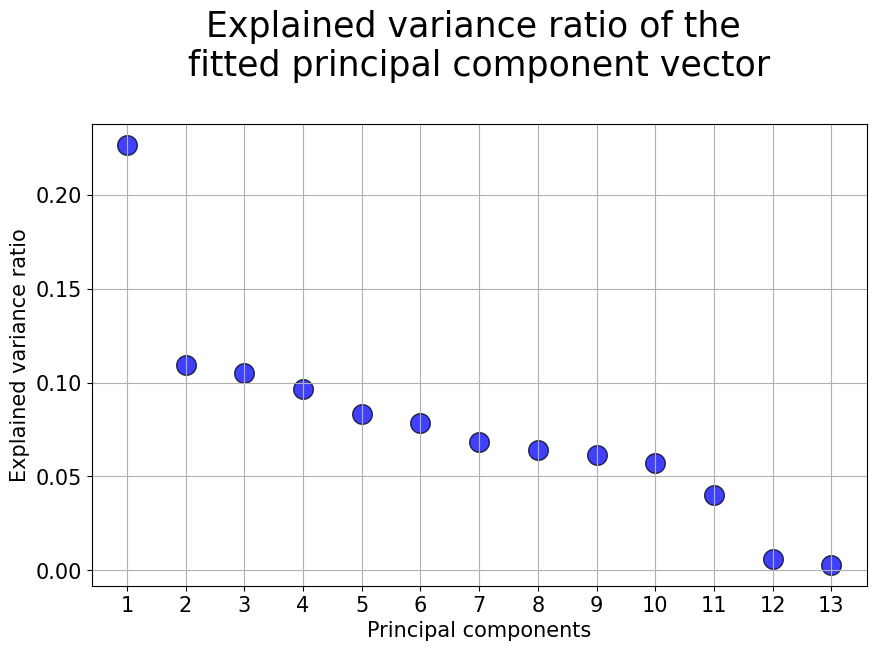

In [ ]:
#Now, let's visualize the PCA results
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx3_pca.explained_variance_ratio_))],
            y=dfx3_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='blue',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx3_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

To explain 95% variance in our normalised fin_char_data_without_census_v3 dataset, we reduce the dimensionality from 13 to 10 principal components.





In [ ]:
# Apply PCA to reduce dimensionality to explain 95% of variance.
pca = PCA(n_components=0.95) # Use 0.95 to automatically select components
X_train_v3_pca = pca.fit_transform(X_train_v3_scaled)
X_test_v3_pca = pca.transform(X_test_v3_scaled)

Calculate the PCA loadings - it will come in handy when examining the logistic regression, as it shows which variables that best represent each principal components.

In [ ]:
# Calculate PCA loadings
loadings = pd.DataFrame(pca.components_.T, index=X_v3.columns,
                        columns=[f"PC{i+1}" for i in range(pca.n_components_)])
print(loadings)

                                     PC1       PC2       PC3       PC4  \
TotalMonthlyIncomeAmount        0.456395 -0.240897 -0.281067 -0.285056   
NoteAmount                      0.537172  0.171960 -0.027936 -0.020570   
HousingExpenseRatioPercent      0.111064  0.545058  0.407774  0.389625   
LoanAcquisitionActualUPBAmt     0.541336  0.170832  0.016951 -0.004925   
LTVRatioPercent                 0.028649 -0.097603  0.429185  0.041907   
Borrower1CreditScoreValue       0.166915 -0.264970 -0.056166  0.125744   
PMICoveragePercent              0.117373 -0.423184  0.534124  0.096085   
Borrower1AgeAtApplicationYears  0.088755  0.103645 -0.246225  0.017762   
Borrower1Race1Type             -0.046040 -0.277153 -0.158568  0.332435   
Borrower1EthnicityType          0.057933 -0.152673 -0.326738  0.505449   
Borrower1GenderType             0.003874 -0.022002 -0.166507  0.596926   
PropertyType                    0.254395  0.234648 -0.040275  0.088121   
MortgageType                   -0.2778

**Revise this evaluation**

| Principal Components (PC) | Most Contributing Variable | Loading Value | Interpretation |
|:-----|:------:|:------:|-----:|
|PC1 | LoanAcquisitionActualUPBAmt | 0.541336 | Financial size of the Loan |
|PC2 | HousingExpenseRatioPercent | 0.545058 | Housing cost strain |
|PC3 | PMICoveragePercent  | 0.534124 | Role of private mortgage insurance|
|PC4 | Borrower1GenderType | 0.596926  | Gender-related effects|
|PC5 | Borrower1CreditScoreValue | 0.585705 | Borrower-creditworthiness|
|PC6| Borrower1AgeAtApplicationYears| 0.633834 | Age effects|
|PC7| LTVRatioPercent | 0.177803 | Loan-to-Value equity risks|
|PC8| Borrower1EthnicityType | 0.336180 | Socio-cultural factors|
|PC9| PropertyType | 0.772302| Property (real estate) type effects|
|PC10| Borrower1EthnicityType| 0.583556 | Socio-cultural factors|







# **Data Modelling**

After training the set and doing the principal component analysis (to explain 95% variance of our dataset), the following methods will be used to multivariate analysis:
- Supervised machine learning models (Decision Trees Classifion Tree and Random Forests)  
- Logistic regression models
- ROC
- AUC

Then, compare the models and see which one is the best. Also, I want to investigate if race is factor that will lead to mortgage deliquency rate.


##Decision Tree Classifier Tree

In [ ]:
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

dt_classifier = DecisionTreeClassifier(random_state=42)  # Consider hyperparameter tuning
dt_classifier.fit(X_train_v3_pca, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.6340132855595325, 0.9848484848484849, 'x[1] <= 1.343\ngini = 0.19\nsamples = 16904\nvalue = [15112, 1792]'),
 Text(0.42418879127055115, 0.9545454545454546, 'x[1] <= 0.318\ngini = 0.141\nsamples = 14527\nvalue = [13419, 1108]'),
 Text(0.5291010384150419, 0.9696969696969697, 'True  '),
 Text(0.22205296219128418, 0.9242424242424242, 'x[2] <= 1.204\ngini = 0.096\nsamples = 10329\nvalue = [9804, 525]'),
 Text(0.1377974418764658, 0.8939393939393939, 'x[6] <= 0.311\ngini = 0.078\nsamples = 8450\nvalue = [8106, 344]'),
 Text(0.0790891760996506, 0.8636363636363636, 'x[7] <= -0.507\ngini = 0.063\nsamples = 6228\nvalue = [6026, 202]'),
 Text(0.04962412650169913, 0.8333333333333334, 'x[3] <= 4.478\ngini = 0.109\nsamples = 1395\nvalue = [1314, 81]'),
 Text(0.04809251304264586, 0.803030303030303, 'x[7] <= -0.507\ngini = 0.107\nsamples = 1392\nvalue = [1313, 79]'),
 Text(0.04732670631311923, 0.7727272727272727, 'x[3] <= 3.791\ngini = 0.106\nsamples = 1391\nvalue = [1313, 78]'),
 Text(0.038749

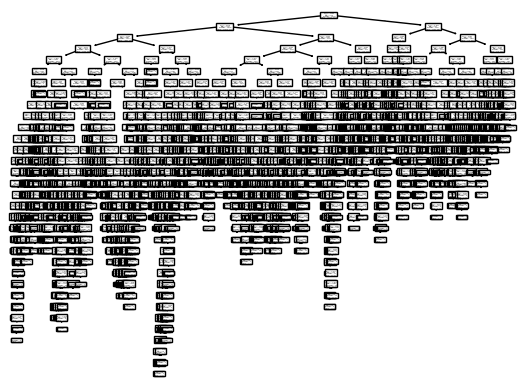

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_v3_pca, y_train)
plot_tree(clf)

In [ ]:
# Make predictions
y_pred = dt_classifier.predict(X_test_v3_pca)
y_pred_proba = dt_classifier.predict_proba(X_test_v3_pca)[:,1]


# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3750
           1       0.32      0.34      0.33       476

    accuracy                           0.85      4226
   macro avg       0.62      0.62      0.62      4226
weighted avg       0.85      0.85      0.85      4226

[[3409  341]
 [ 314  162]]
AUC Score: 0.6247014005602242


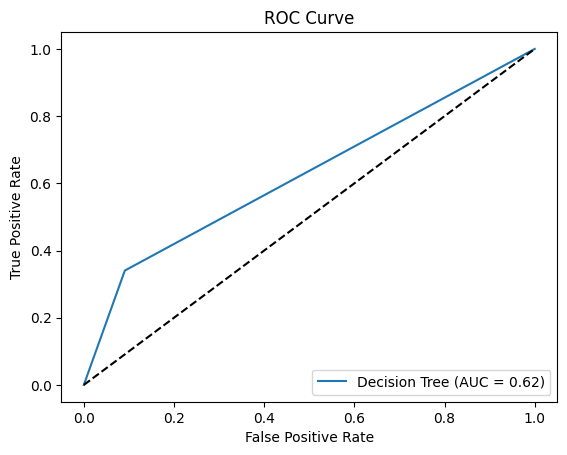

In [ ]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--') # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

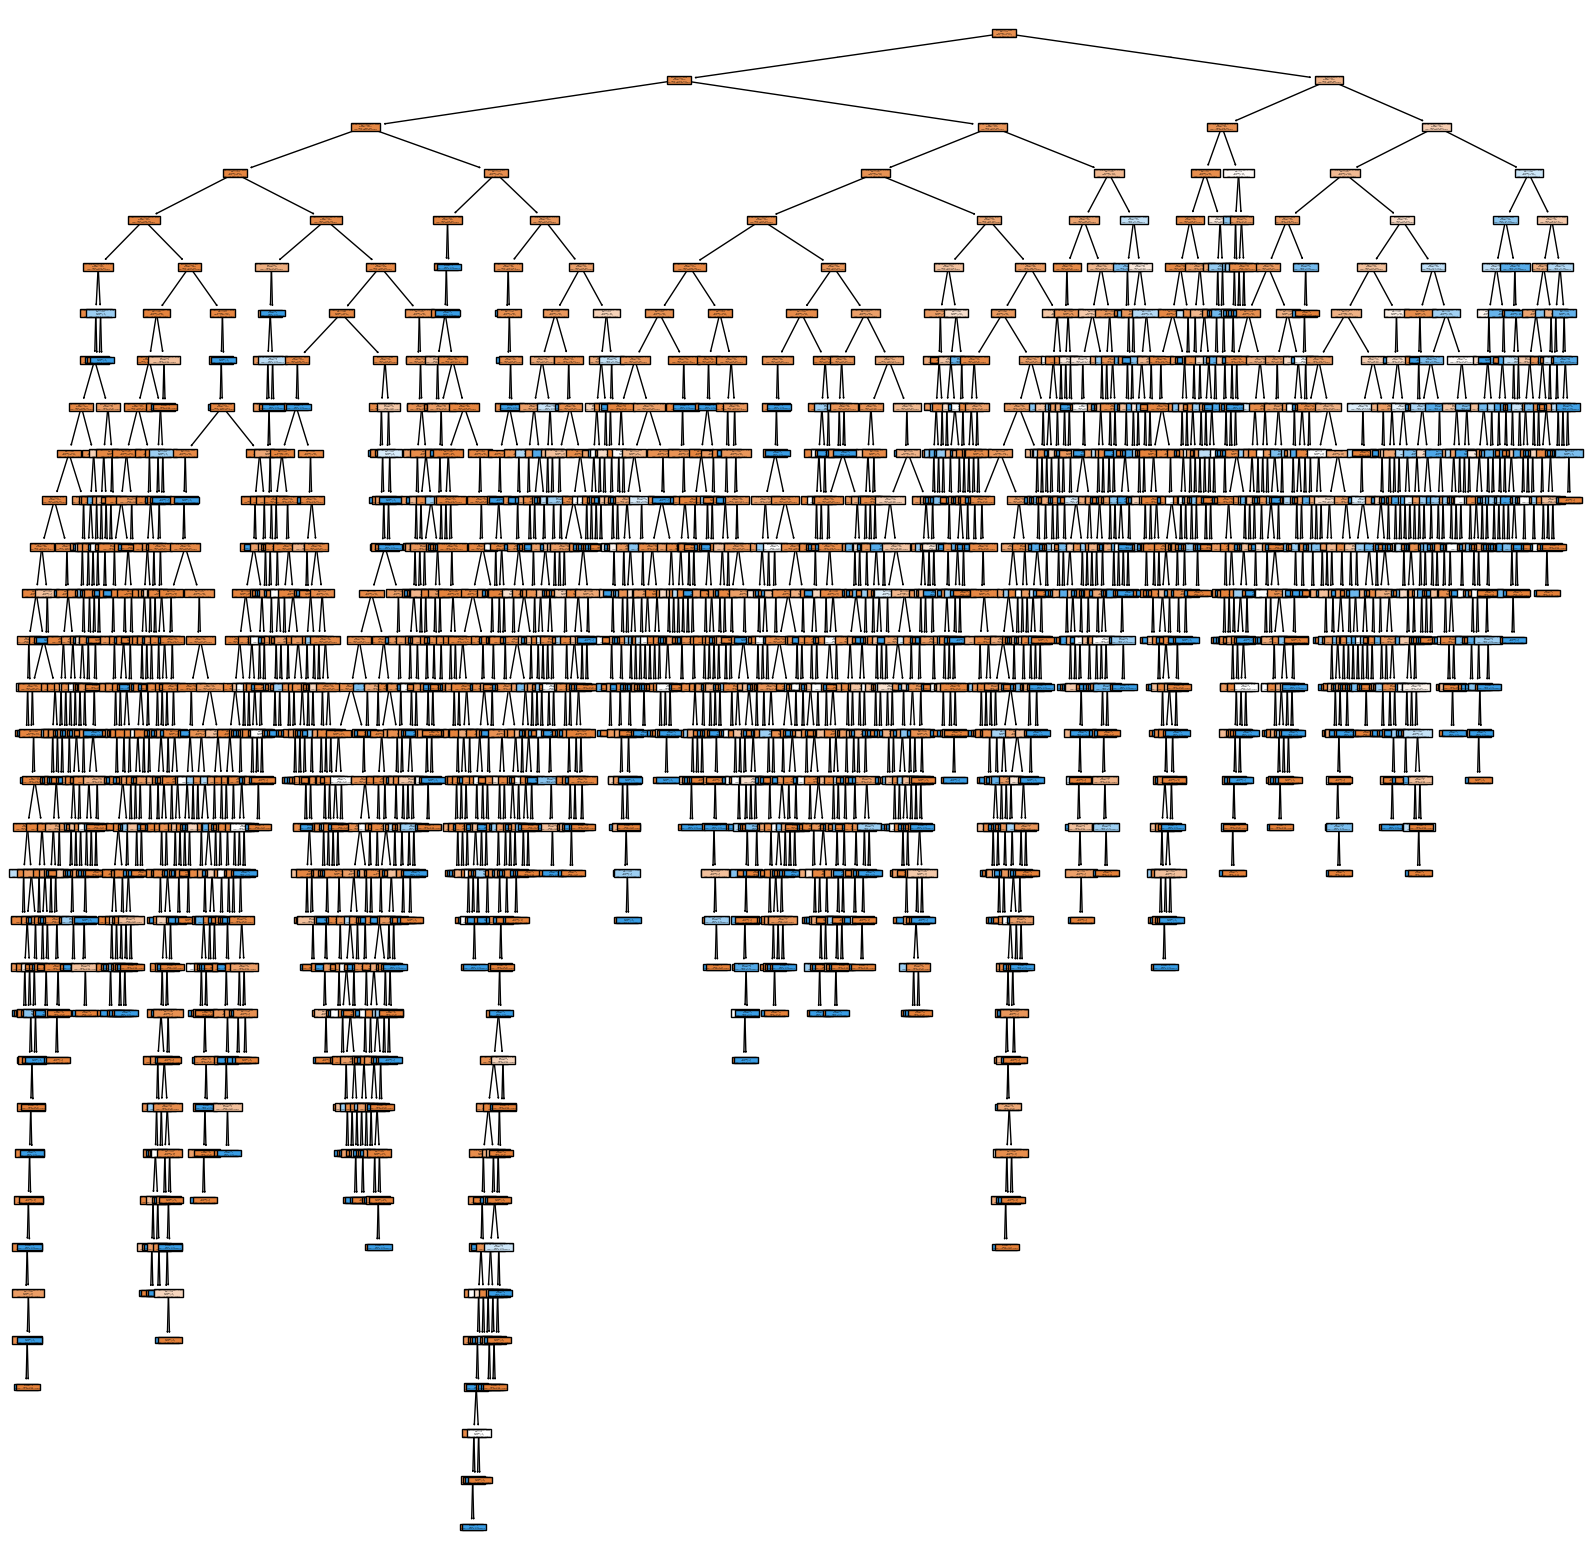

In [ ]:
from sklearn import tree
plt.figure(figsize=(20,20))
features = X_v3.columns
classes = ['Low Risk of Delinquency','High Risk of Delinquency']
tree.plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

## Pruning the Decision Tree: Classifier Tree

**Credit:** https://www.kaggle.com/code/arunmohan003/pruning-decision-trees-tutorial

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf,param_grid=params)
gcv.fit(X_train_v3_pca,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 0.9097846663511595
Test score 0.8954093705631803
Train Confusion matrix


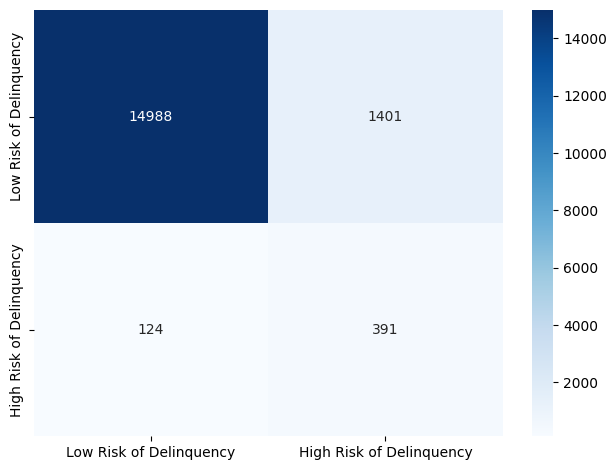

Test Confusion matrix


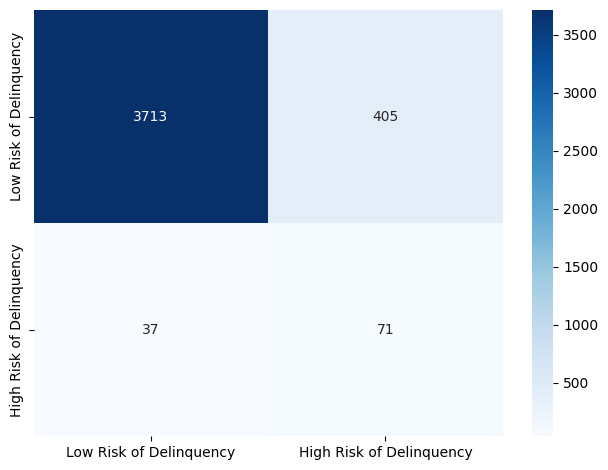

In [ ]:
model = gcv.best_estimator_
model.fit(X_train_v3_pca,y_train)
y_train_pred = model.predict(X_train_v3_pca)
y_test_pred = model.predict(X_test_v3_pca)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

Decision trees can easily overfit. One way to avoid it is to limit the growth of trees by setting constrains. We can limit parameters like max_depth , min_samples etc. But a most effective way is to use post pruning methods like cost complexity pruning. This helps to improve test accuracy and get a better model.

Cost complexity pruning is all about finding the right parameter for alpha.We will get the alpha values for this tree and will check the accuracy with the pruned trees.

In [ ]:
path = clf.cost_complexity_pruning_path(X_train_v3_pca, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 4.73260767e-05 4.92979965e-05 5.07065107e-05
 5.17628964e-05 5.25845296e-05 5.25845296e-05 5.25845296e-05
 5.32418363e-05 5.37796326e-05 5.37796326e-05 5.37796326e-05
 5.40134571e-05 5.42277962e-05 5.42277962e-05 5.42277962e-05
 5.42277962e-05 5.46070115e-05 5.46070115e-05 5.46070115e-05
 5.46070115e-05 5.46070115e-05 5.49320533e-05 5.49320533e-05
 5.49320533e-05 5.49320533e-05 5.52137561e-05 5.52492862e-05
 5.53409767e-05 5.54602461e-05 5.54602461e-05 5.54602461e-05
 5.54602461e-05 5.55722870e-05 5.55722870e-05 5.56777373e-05
 5.56777373e-05 5.57771618e-05 5.57771618e-05 5.58710627e-05
 5.58710627e-05 5.59598880e-05 5.60440382e-05 5.61238730e-05
 5.61997160e-05 5.61997160e-05 5.61997160e-05 5.61997160e-05
 5.61997160e-05 5.61997160e-05 5.63405675e-05 5.63405675e-05
 5.63405675e-05 5.64686142e-05 5.66926960e-05 5.66926960e-05
 5.67673899e-05 5.67912920e-05 5.67912920e-05 5.68823037e-05
 5.68823037e-05 5.68823037e-05 5.68823037e-05 5.68823037e-05
 5.69252337e-05 5.696657

In [ ]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_v3_pca, y_train)
    clfs.append(clf)

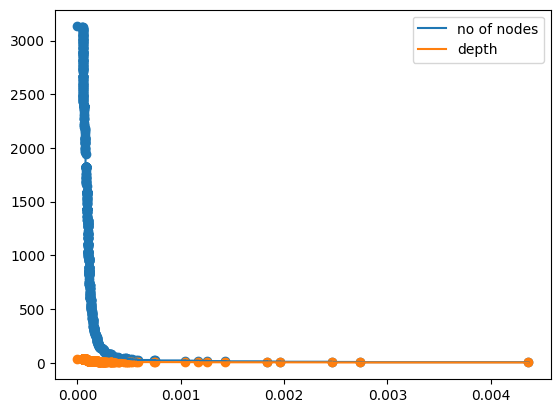

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

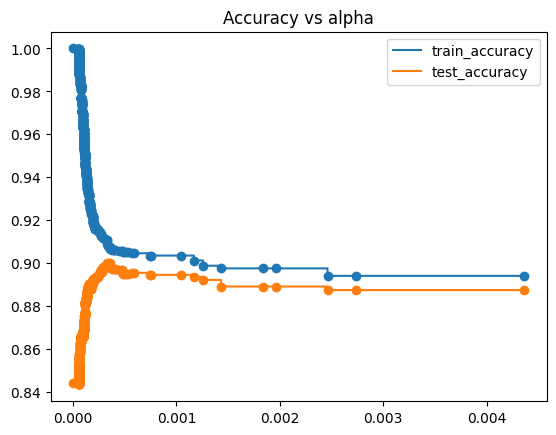

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train_v3_pca)
    y_test_pred = c.predict(X_test_v3_pca)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

We choose 0.001

Train score 0.9034548035967819
Test score 0.8944628490298154
Train Confusion matrix


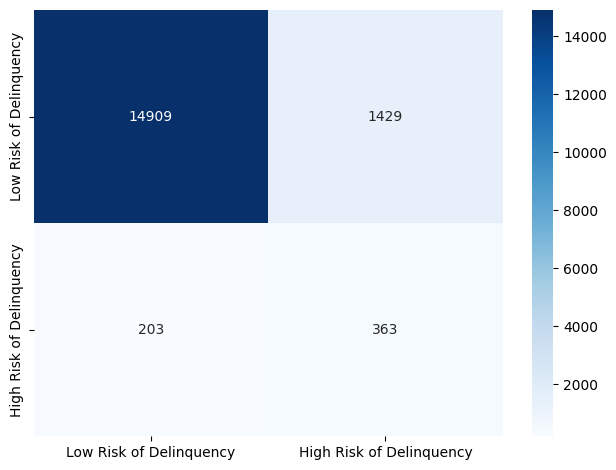

Test Confusion matrix


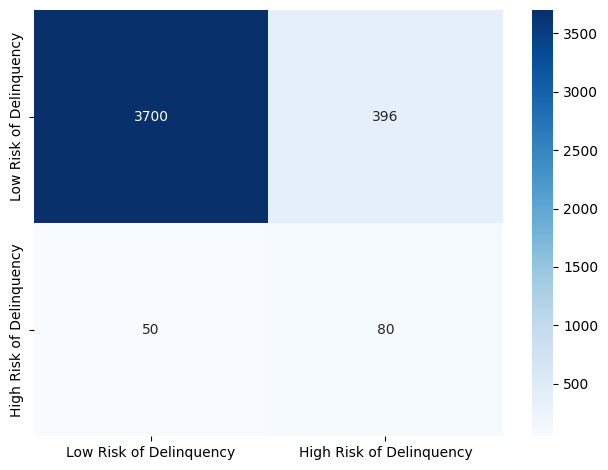

In [ ]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.001)
clf_.fit(X_train_v3_pca,y_train)
y_train_pred = clf_.predict(X_train_v3_pca)
y_test_pred = clf_.predict(X_test_v3_pca)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

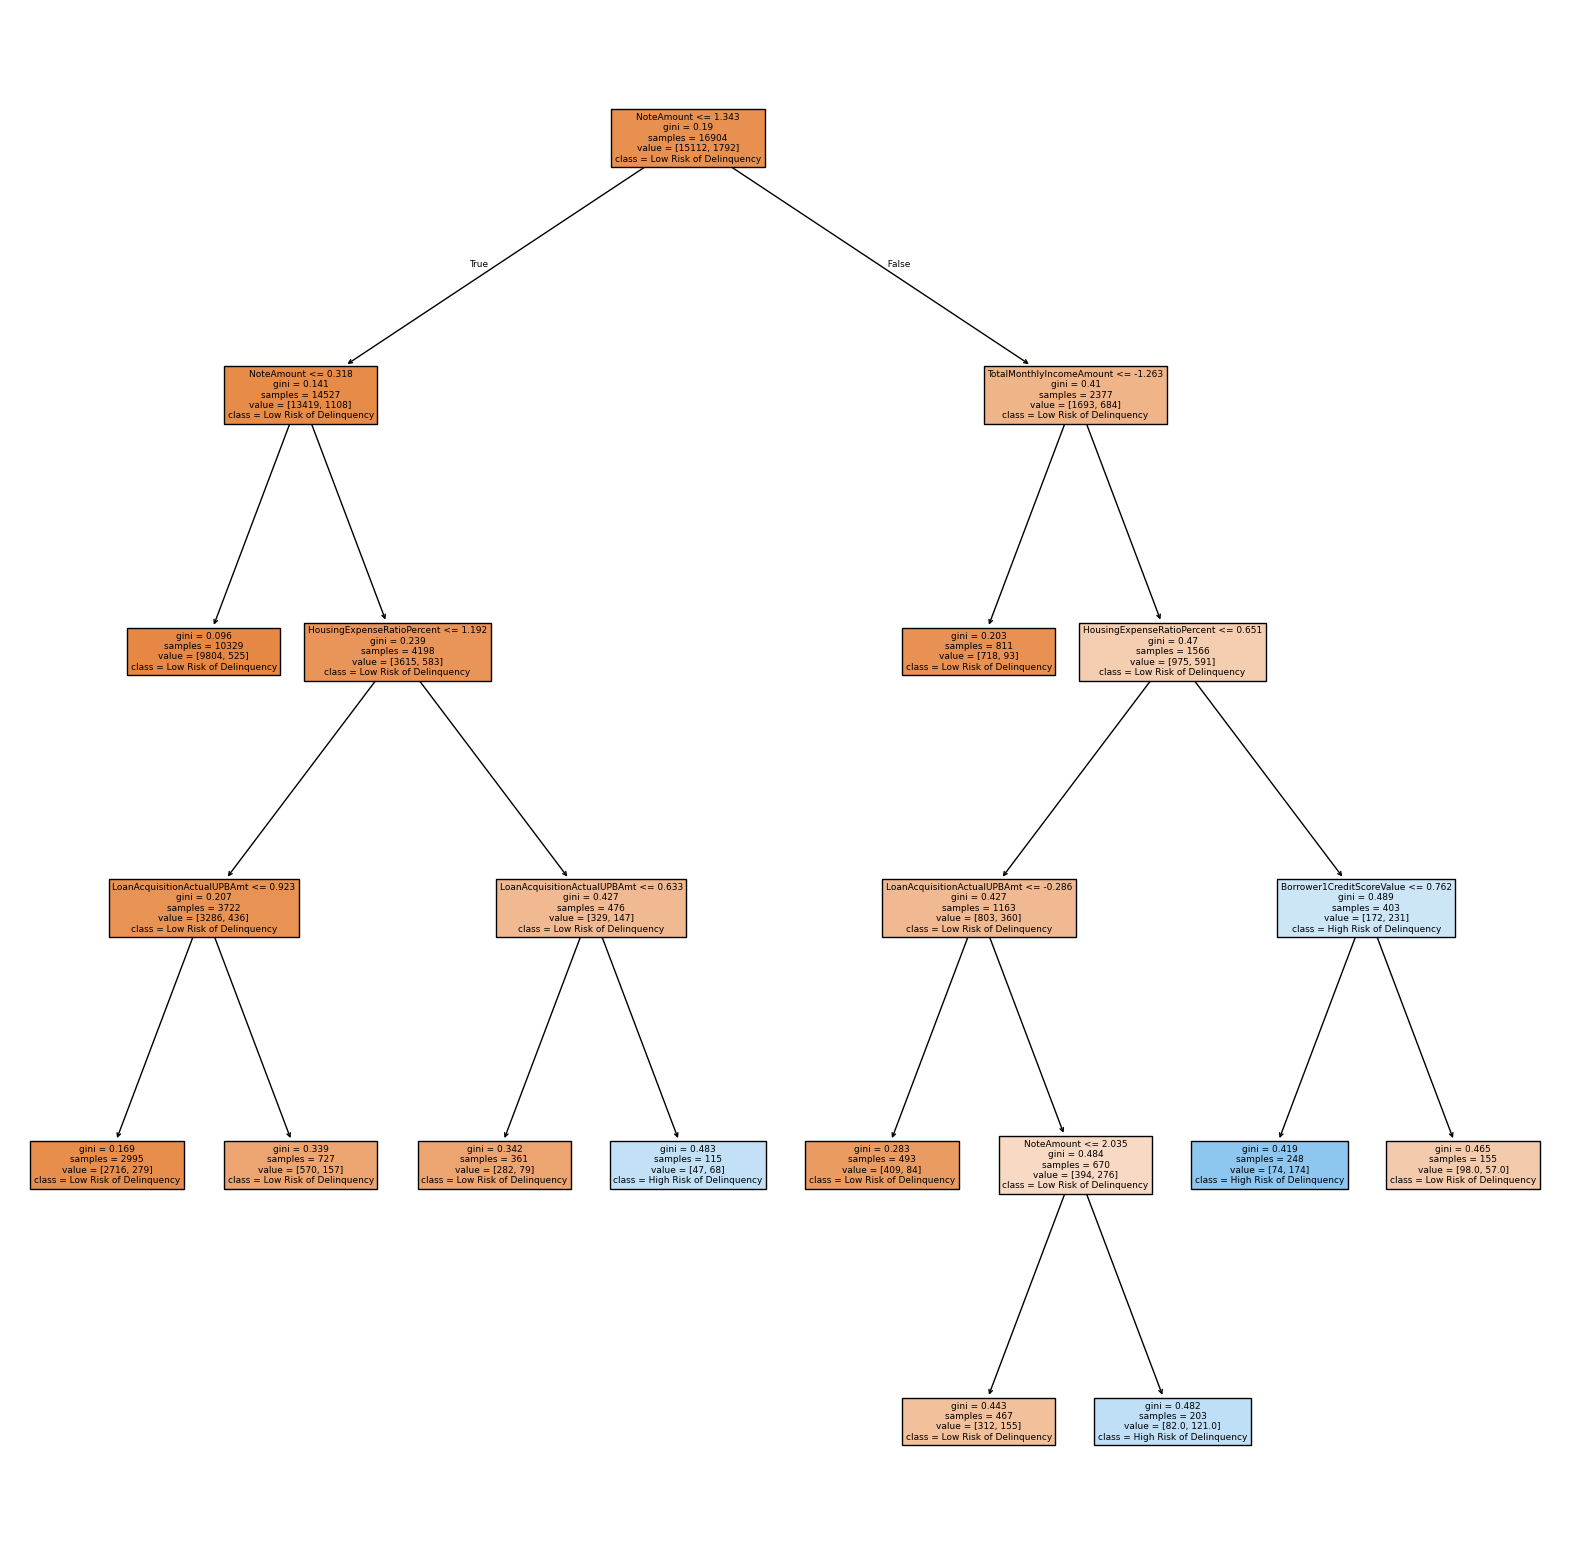

In [ ]:
plt.figure(figsize=(20,20))
features = X_v3.columns
classes = ['Low Risk of Delinquency','High Risk of Delinquency']
tree.plot_tree(clf_,feature_names=features,class_names=classes,filled=True)
plt.show()

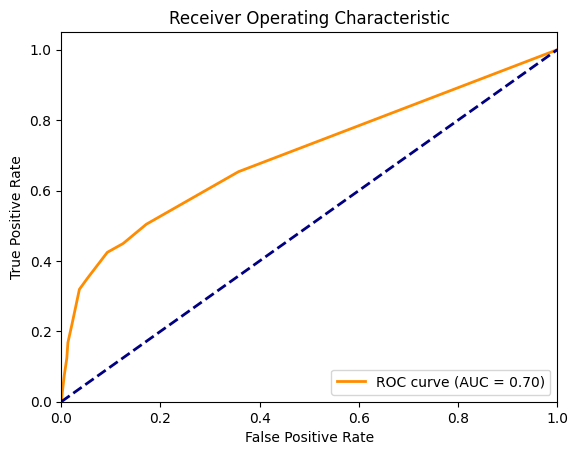

In [ ]:
# Assuming clf_ and X_test_v3_pca are defined from the previous code
y_pred_proba = clf_.predict_proba(X_test_v3_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

##Random Forests

Random Forest Importance Features:
Want to investigate which characteristic is important with the pca X_train_v3_pca = pca.fit_transform(X_train_v3_scaled)
X_test_v3_pca = pca.transform(X_test_v3_scaled)

   Feature  Importance
1        2    0.180297
2        3    0.111212
3        4    0.109882
6        7    0.094786
0        1    0.093905
5        6    0.083659
9       10    0.082466
7        8    0.081483
8        9    0.081462
4        5    0.080848


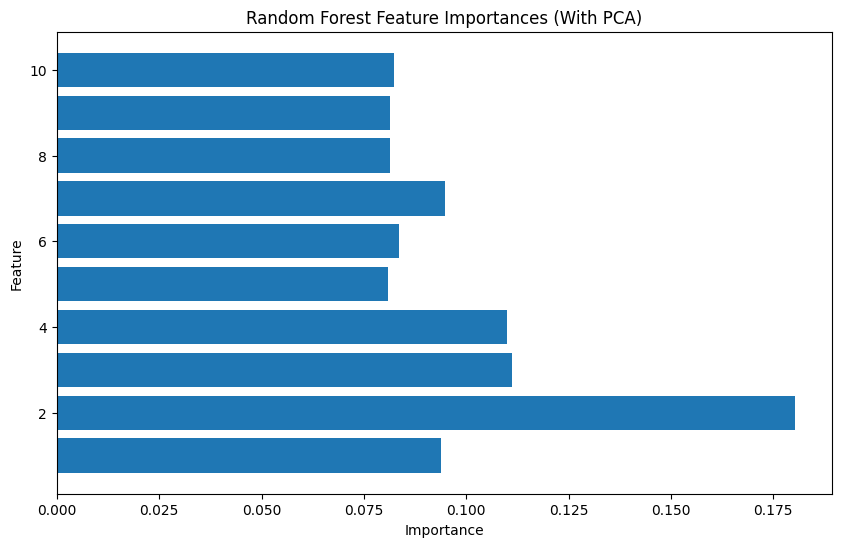

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_v3_pca, y_train)

# Get feature importances
importances = rf_classifier.feature_importances_

# a DataFrame to display importances
feature_importances = pd.DataFrame({'Feature': range(1,len(importances)+1), 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print or visualize feature importances
print(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances (With PCA)')
plt.show()

Random Forest Importance Features: Want to investigate which characteristic is important without the pca #Define X and y from the dataset
X_v3 = fin_char_data_without_census_v3.drop('HighRiskofMortgageDeliquency',axis=1)
y_v3 = fin_char_data_without_census_v3['HighRiskofMortgageDeliquency']
X_train, X_test, y_train, y_test = train_test_split(X_v3, y_v3, test_size=0.2, random_state=42)

                           Feature  Importance
2       HousingExpenseRatioPercent    0.285816
0         TotalMonthlyIncomeAmount    0.134058
3      LoanAcquisitionActualUPBAmt    0.124472
1                       NoteAmount    0.120891
7   Borrower1AgeAtApplicationYears    0.094409
4                  LTVRatioPercent    0.068197
12                    MortgageType    0.037734
5        Borrower1CreditScoreValue    0.034739
8               Borrower1Race1Type    0.022520
11                    PropertyType    0.021508
10             Borrower1GenderType    0.020168
6               PMICoveragePercent    0.018468
9           Borrower1EthnicityType    0.017018


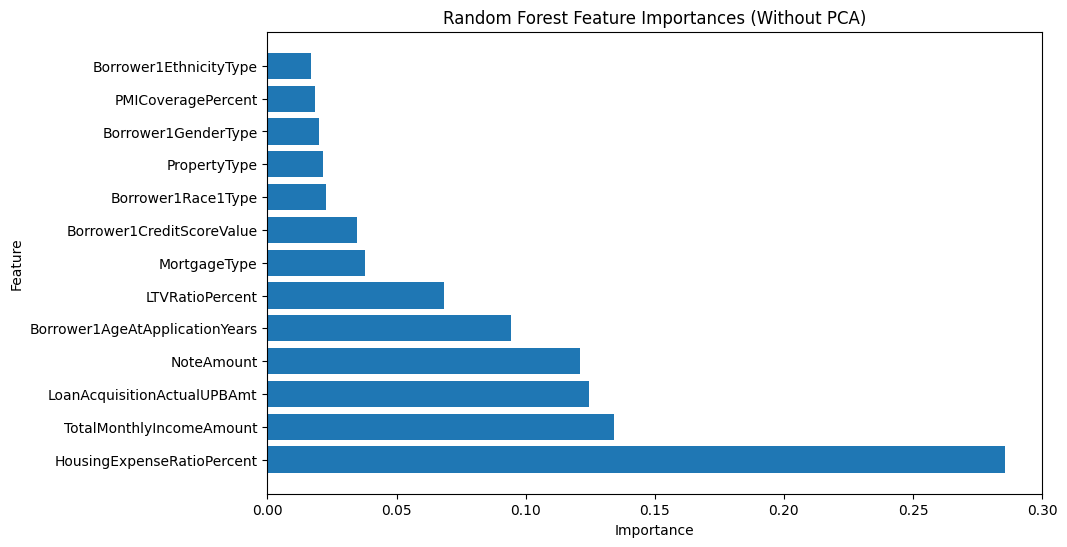

In [ ]:
# Initialize and train the RandomForestClassifier
rf_classifier_no_pca = RandomForestClassifier(random_state=42)
rf_classifier_no_pca.fit(X_train, y_train)

# Get feature importances
importances = rf_classifier_no_pca.feature_importances_

# a DataFrame to display importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print or visualize feature importances
print(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importances (Without PCA)')
plt.show()

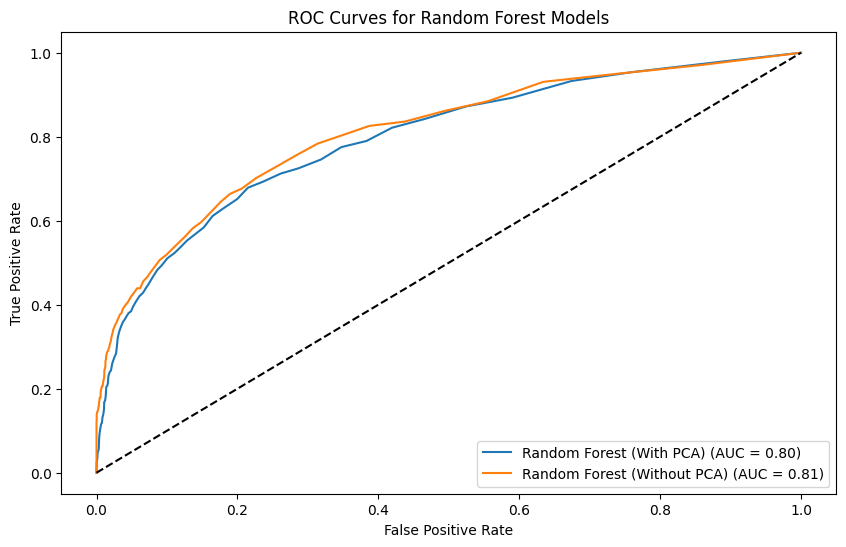

Random Forest (With PCA) AUC: 0.7958266106442576
Random Forest (Without PCA) AUC: 0.809250700280112


In [ ]:
# trained RandomForestClassifier model (with PCA)
y_pred_proba_rf_pca = rf_classifier.predict_proba(X_test_v3_pca)[:, 1]
fpr_rf_pca, tpr_rf_pca, thresholds_rf_pca = roc_curve(y_test, y_pred_proba_rf_pca)
auc_rf_pca = roc_auc_score(y_test, y_pred_proba_rf_pca)

#  trained RandomForestClassifier model (without PCA) - you need to retrain it without PCA data
y_pred_proba_rf_no_pca = rf_classifier_no_pca.predict_proba(X_test)[:, 1]
fpr_rf_no_pca, tpr_rf_no_pca, thresholds_rf_no_pca = roc_curve(y_test, y_pred_proba_rf_no_pca)
auc_rf_no_pca = roc_auc_score(y_test, y_pred_proba_rf_no_pca)


plt.figure(figsize=(10, 6))
plt.plot(fpr_rf_pca, tpr_rf_pca, label=f'Random Forest (With PCA) (AUC = {auc_rf_pca:.2f})')
plt.plot(fpr_rf_no_pca, tpr_rf_no_pca, label=f'Random Forest (Without PCA) (AUC = {auc_rf_no_pca:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random Forest Models')
plt.legend(loc='lower right')
plt.show()

print(f"Random Forest (With PCA) AUC: {auc_rf_pca}")
print(f"Random Forest (Without PCA) AUC: {auc_rf_no_pca}")

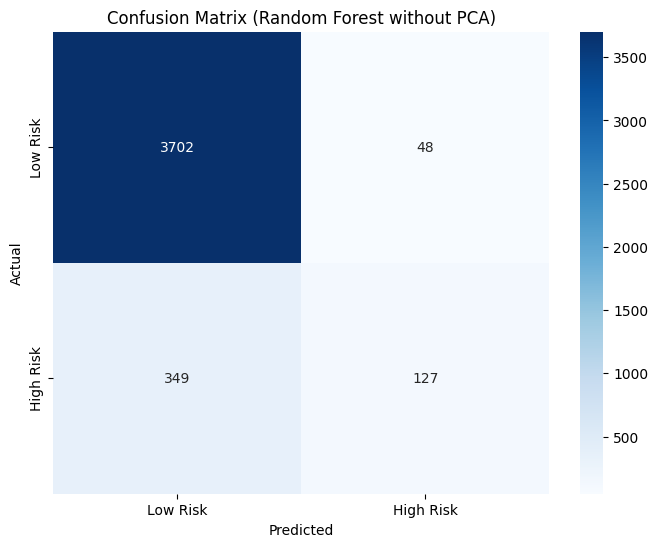

In [ ]:
y_pred_no_pca = rf_classifier_no_pca.predict(X_test)

# Create the confusion matrix
cm_no_pca = confusion_matrix(y_test, y_pred_no_pca)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_no_pca, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Random Forest without PCA)")
plt.show()

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Import statsmodels
import statsmodels.api as sm


Computing the Logistic Regression with the PCA

In [ ]:
#X_train_v3_pca, y_train
X_train_pa_sm = sm.add_constant(X_train_v3_pca)
logm2 = sm.GLM(y_train, X_train_pa_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Generalized Linear Model Regression Results                       
========================================================================================
Dep. Variable:     HighRiskofMortgageDeliquency   No. Observations:                16904
Model:                                      GLM   Df Residuals:                    16893
Model Family:                          Binomial   Df Model:                           10
Link Function:                            Logit   Scale:                          1.0000
Method:                                    IRLS   Log-Likelihood:                -4602.5
Date:                          Wed, 19 Feb 2025   Deviance:                       9205.1
Time:                                  13:36:20   Pearson chi2:                 3.85e+04
No. Iterations:                               7   Pseudo R-squ. (CS):             0.1233
Covariance Type:                      nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8212      0.040    -69.753      0.000      -2.901      -2.742
x1             0.1550      0.015     10.021      0.000       0.125       0.185
x2             0.9518      0.028     34.228      0.000       0.897       1.006
x3             0.5606      0.029     19.241      0.000       0.503       0.618
x4             0.4733      0.025     18.613      0.000       0.423       0.523
x5            -0.0928      0.029     -3.193      0.001      -0.150      -0.036
x6            -0.0117      0.030     -0.396      0.692      -0.070       0.046
x7             0.3359      0.030     11.249      0.000       0.277       0.394
x8            -0.1709      0.035     -4.860      0.000      -0.240      -0.102
x9             0.0237      0.027      0.864      0.387      -0.030       0.077
x10            0.1364      0.032      4.249      0.000       0.073       0.199
==============================================================================
"""

The regression results involves a Principal Component Analysis (PCA) model where the original variables are reduced into components (x1, x2, ..., x10).

Key Model Information:
  - Dependent Variable: HighRiskofMortgageDelinquency (binary outcome).
  - Model Type: Binomial with a Logit (logistic) link function.
  - Sample Size: 16,904 observations.
  - Pseudo R-squared (CS): 0.1233 indicates that about 12.33% of the variability in the dependent variable is explained by the principal components.
  - Log-Likelihood: -4602.5, slightly better than the earlier model, suggesting PCA might provide some improvement in fit.

Here's a summary of the regression analysis:
- **`x1` (First Principal Component)**
Positive coefficient (0.1550): A higher score on this component increases the risk.
P-value < 0.001: Highly significant.
- **`x2` (Second Principal Component)**
Positive coefficient (0.9518): A strong positive association with delinquency risk.
P-value < 0.001: Highly significant.
- **`x3` (Third Principal Component)**
Positive coefficient (0.5606): Significant positive effect on risk.
P-value < 0.001: Highly significant.
- **`x4` (Fourth Principal Component)**
Positive coefficient (0.4733): Contributes significantly to the likelihood of delinquency.
P-value < 0.001: Highly significant.
- **`x5` (Fifth Principal Component)**
Negative coefficient (-0.0928): A higher score on this component reduces the risk of delinquency.
P-value = 0.001: Significant.
- **`x7` (Seventh Principal Component)**
Positive coefficient (0.3359): Increases delinquency risk.
P-value < 0.001: Highly significant.
- **`x10` (Tenth Principal Component)**
Positive coefficient (0.1364): Smaller effect but still significant.
P-value = 0.001: Significant.
- **Non-Significant Components:**
`x6` (P-value = 0.692) and `x9` (P-value = 0.387) do not significantly contribute to the model. Their coefficients are close to zero, suggesting minimal impact on the risk of delinquency.

**Summary:**
The PCA model reduces the dimensionality of the original dataset, and most of the significant principal components (e.g., `x1`, `x2`, `x3`, `x4`) are positively associated with mortgage delinquency risk.
The PCA regression provides a similar overall fit (Pseudo R-squared = 0.1233) compared to the first model but simplifies the interpretation by focusing on fewer, aggregated components rather than individual variables.
Components like `x5` and `x7` demonstrate nuanced relationships (e.g., both increasing and reducing risk), showing the power of PCA in capturing underlying patterns.

Computing the Logistic Regression without the PCA

In [ ]:
#X_train, y_train
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Generalized Linear Model Regression Results                       
========================================================================================
Dep. Variable:     HighRiskofMortgageDeliquency   No. Observations:                16904
Model:                                      GLM   Df Residuals:                    16890
Model Family:                          Binomial   Df Model:                           13
Link Function:                            Logit   Scale:                          1.0000
Method:                                    IRLS   Log-Likelihood:                -4526.2
Date:                          Wed, 19 Feb 2025   Deviance:                       9052.4
Time:                                  13:36:20   Pearson chi2:                 4.62e+04
No. Iterations:                               8   Pseudo R-squ. (CS):             0.1312
Covariance Type:                      nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -26.4877      2.285    -11.591      0.000     -30.967     -22.009
TotalMonthlyIncomeAmount           0.7671      0.154      4.991      0.000       0.466       1.068
NoteAmount                     -1.061e-06   6.84e-07     -1.551      0.121    -2.4e-06     2.8e-07
HousingExpenseRatioPercent         4.0847      0.174     23.474      0.000       3.744       4.426
LoanAcquisitionActualUPBAmt       -0.1569      0.190     -0.825      0.410      -0.530       0.216
LTVRatioPercent                    1.8346      0.344      5.329      0.000       1.160       2.509
Borrower1CreditScoreValue         -0.3763      0.029    -12.760      0.000      -0.434      -0.319
PMICoveragePercent                -0.0134      0.003     -4.558      0.000      -0.019      -0.008
Borrower1AgeAtApplicationYears     0.0120      0.002      5.270      0.000       0.008       0.016
Borrower1Race1Type                 0.0251      0.030      0.848      0.396      -0.033       0.083
Borrower1EthnicityType            -0.2883      0.068     -4.244      0.000      -0.421      -0.155
Borrower1GenderType                0.1731      0.051      3.412      0.001       0.074       0.273
PropertyType                       0.0487      0.014      3.393      0.001       0.021       0.077
MortgageType                       0.0047      0.046      0.104      0.917      -0.085       0.094
==================================================================================================
"""


The table shows the results of a **Generalized Linear Model (GLM) regression analysis.** Here’s a summary of the key insights:

**Key Information**
- Dependent Variable: HighRiskofMortgageDelinquency (indicating the probability of being high risk for mortgage delinquency, modeled as a binary outcome).
- Model Type: Binomial (appropriate for binary classification) with a Logit (logistic) link function.
- Sample Size: 16,904 observations were used.
- Pseudo R-squared (CS): 0.1312 indicates the model explains approximately 13.12% of the variability in the dependent variable. While low, this is not uncommon for logistic regression in social sciences and business applications.


**Interpreting Key Predictors:**
The coefficients (coef) represent the effect of each predictor on the log-odds of being classified as high risk. Here's an overview of the significant predictors:

- **`TotalMonthlyIncomeAmount`**

  Positive coefficient (0.7671): Higher monthly income increases the log-odds of being high risk.
  P-value < 0.001: This predictor is statistically significant.

- **`HousingExpenseRatioPercent`**

  Large positive coefficient (4.0847): A higher housing expense ratio significantly increases the risk of delinquency.
  P-value < 0.001: Strong evidence for significance.
- **`LTVRatioPercent`** (Loan-to-Value Ratio)

  Positive coefficient (1.8346): Higher LTV ratios increase delinquency risk, suggesting more leveraged loans are riskier.
  P-value < 0.001: Significant.
- **`Borrower1CreditScoreValue`**

  Negative coefficient (-0.3763): Higher credit scores decrease the risk of delinquency.
  P-value < 0.001: Very significant.
- **`Borrower1AgeAtApplicationYears`**

  Positive coefficient (0.0120): Older borrowers have a slightly higher risk, though the effect is small.
  P-value < 0.001: Significant.
- **`PMICoveragePercent`**

  Negative coefficient (-0.0134): Higher private mortgage insurance (PMI) coverage reduces risk.
  P-value < 0.001: Significant.
- **`Borrower1EthnicityType`**

  Negative coefficient (-0.2883): Certain ethnicities have a lower associated risk.
  P-value < 0.001: Statistically significant.
- **`Borrower1GenderType`**

  Positive coefficient (0.1731): Gender has a small but significant impact on delinquency risk.
  P-value < 0.001: Statistically significant.
- **`PropertyType and MortgageType`**

  Small coefficients, with property type being significant but mortgage type not statistically significant.
- **Non-Significant Predictors:**

  **`NoteAmount`** and **`LoanAcquisitionActualUPBAmt`** have p-values > 0.05, meaning they do not significantly affect the log-odds of being high risk.


**Summary:**

The model identifies key financial factors (like income, housing expense ratio, and credit score) as significant contributors to mortgage delinquency risk.
LTV ratio and PMI coverage are particularly relevant for lenders managing high-risk loans.

Demographic variables (age, ethnicity, and gender) also play a role but may need cautious interpretation due to potential ethical or legal implications.

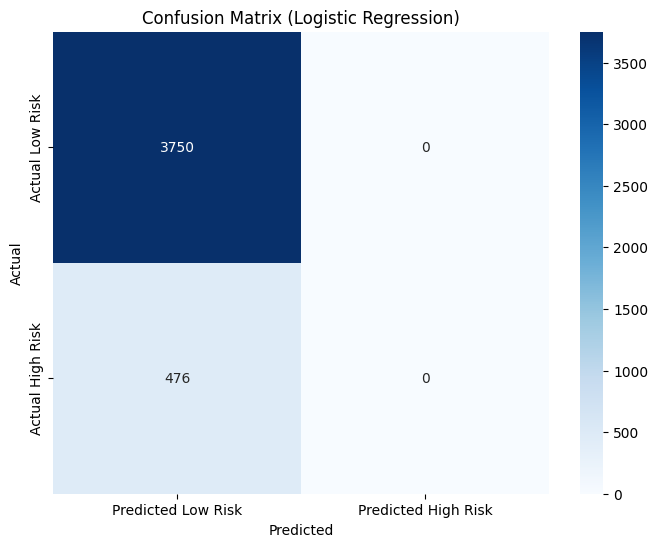

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)   # Fit the model to your training data
y_pred = logreg.predict(X_test)  # Predict using the logistic regression model
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Low Risk', 'Predicted High Risk'],
            yticklabels=['Actual Low Risk', 'Actual High Risk'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

In [ ]:
#should I do a VIF model

## LightGBM

Test lightGBM with PCA

In [ ]:
#build the model
import lightgbm as lgb
clf_lgb_pa = lgb.LGBMClassifier()
clf_lgb_pa.fit(X_train_v3_pca, y_train)

[LightGBM] [Info] Number of positive: 1792, number of negative: 15112
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003013 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 16904, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.106010 -> initscore=-2.132157
[LightGBM] [Info] Start training from score -2.132157


LGBMClassifier()

In [ ]:
# predict the results
y_pred_pa=clf_lgb_pa.predict(X_test_v3_pca)

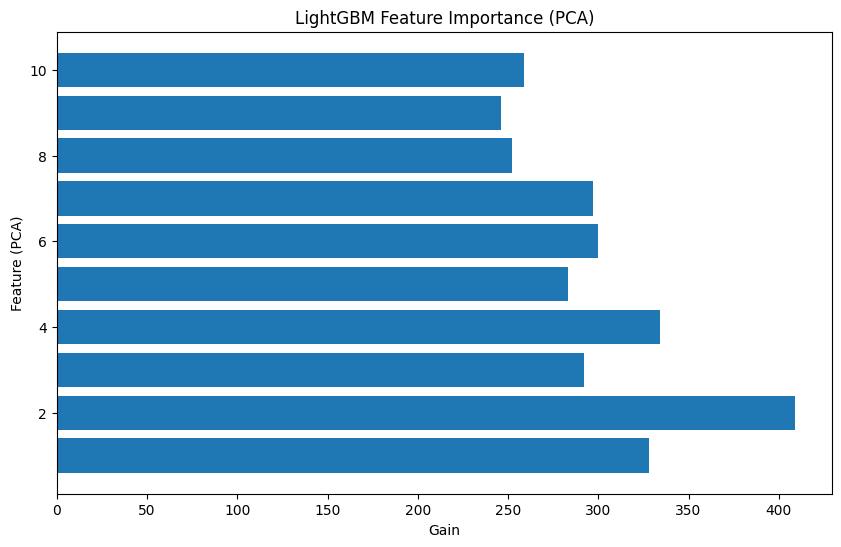

In [ ]:
# Assuming clf_lgb_pa is your trained LightGBM model
feature_importances = clf_lgb_pa.feature_importances_


feature_importance_df = pd.DataFrame({'Feature': range(1, len(feature_importances) + 1),
                                      'Gain': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Gain', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Gain'])
plt.xlabel('Gain')
plt.ylabel('Feature (PCA)')
plt.title('LightGBM Feature Importance (PCA)')
plt.show()

In [ ]:
# view accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred_pa, y_test)
print('LightGBM Model accuracy score with PCA: {0:0.4f}'.format(accuracy_score(y_test, y_pred_pa)))

LightGBM Model accuracy score with PCA: 0.8987


In [ ]:
#Classification report of the lightGBM model with PCA
print(classification_report(y_test, y_pred_pa))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3750
           1       0.66      0.21      0.32       476

    accuracy                           0.90      4226
   macro avg       0.78      0.60      0.63      4226
weighted avg       0.88      0.90      0.87      4226



Test lightGBM without PCA

In [ ]:
clf_lgb = lgb.LGBMClassifier()
clf_lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1792, number of negative: 15112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1241
[LightGBM] [Info] Number of data points in the train set: 16904, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.106010 -> initscore=-2.132157
[LightGBM] [Info] Start training from score -2.132157


LGBMClassifier()

In [ ]:
# predict the results
y_pred=clf_lgb.predict(X_test)

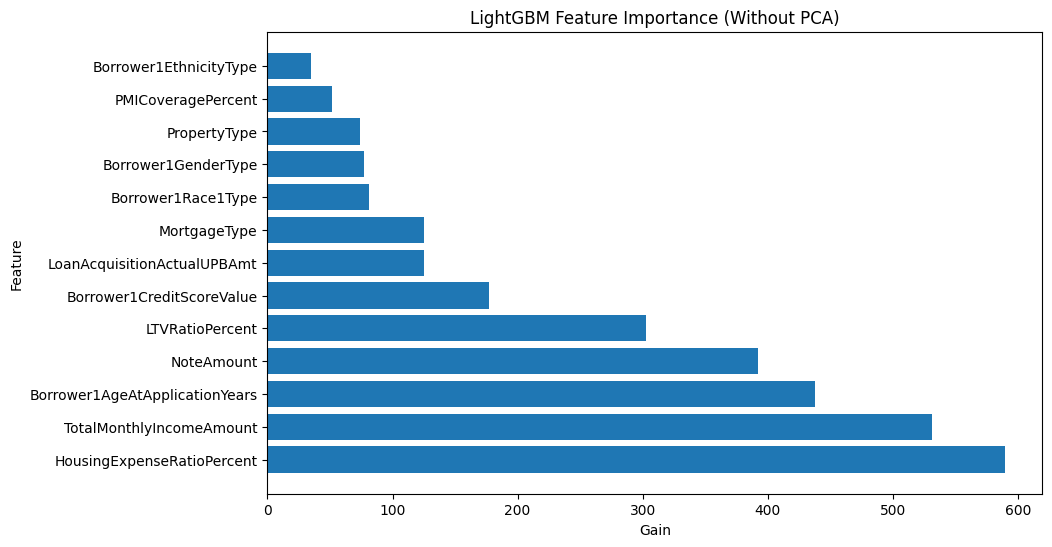

In [ ]:
# Assuming clf_lgb is your trained LightGBM model (without PCA)
feature_importances = clf_lgb.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns,  # Use column names
                                      'Gain': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Gain', ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Gain'])
plt.xlabel('Gain')
plt.ylabel('Feature')
plt.title('LightGBM Feature Importance (Without PCA)')
plt.show()

In [ ]:
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score without PCA: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score without PCA: 0.9053


In [ ]:
#Classification report of the lightGBM model without PCA
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3750
           1       0.72      0.26      0.39       476

    accuracy                           0.91      4226
   macro avg       0.81      0.63      0.67      4226
weighted avg       0.89      0.91      0.89      4226



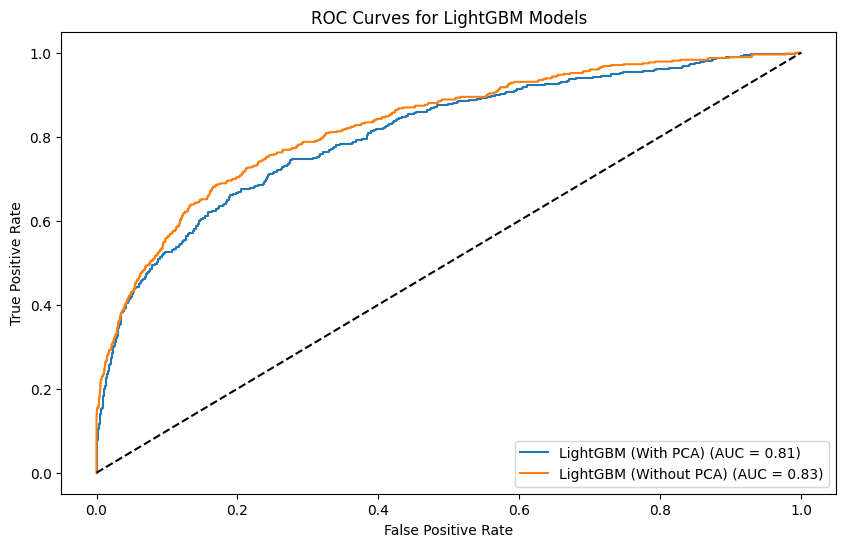

LightGBM (With PCA) AUC: 0.8060739495798319
LightGBM (Without PCA) AUC: 0.8284406162464986


In [ ]:
# Predict probabilities for LightGBM with PCA
y_pred_proba_lgb_pca = clf_lgb_pa.predict_proba(X_test_v3_pca)[:, 1]
fpr_lgb_pca, tpr_lgb_pca, thresholds_lgb_pca = roc_curve(y_test, y_pred_proba_lgb_pca)
auc_lgb_pca = roc_auc_score(y_test, y_pred_proba_lgb_pca)

# Predict probabilities for LightGBM without PCA
y_pred_proba_lgb = clf_lgb.predict_proba(X_test)[:, 1]
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(y_test, y_pred_proba_lgb)
auc_lgb = roc_auc_score(y_test, y_pred_proba_lgb)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_lgb_pca, tpr_lgb_pca, label=f'LightGBM (With PCA) (AUC = {auc_lgb_pca:.2f})')
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (Without PCA) (AUC = {auc_lgb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for LightGBM Models')
plt.legend(loc='lower right')
plt.show()

print(f"LightGBM (With PCA) AUC: {auc_lgb_pca}")
print(f"LightGBM (Without PCA) AUC: {auc_lgb}")